In [105]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from matplotlib import pyplot as plt
import seaborn as sns
sns.set();
from tqdm import tqdm   #progressbar
tqdm.pandas()   #progressbar instantiëren voor pandas
from geopy.geocoders import Nominatim

# Hoe goed kunnen participanten hun eigen smartphonegebruik inschatten? 

per participant een verschilscore (subjectief tov objectief) verkrijgen steeds per vraag. 

In [233]:
app_filename = "D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/floor_appevents(1).csv"
notif_filename = "D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/data/floor/floor_notifications.csv"

Misschien hier ook een lege datafile inlezen waar de gelinkte data kan uitgeschreven worden. Om dat er niet voor alle participanten data is, is het goed om dit eerst in een lege file te steken en daarna om te zetten naar universiteit_advanced.xlsx

In [234]:
leeg = pd.read_excel("D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/experiment verloop/leegvgl.xlsx")

In [235]:
df = pd.read_csv(app_filename, sep=";", parse_dates=['startTime', 'endTime'])
df.drop("Unnamed: 0", axis=1, inplace=True)
df.info()

C:\Users\beheerder\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101531 entries, 0 to 101530
Data columns (total 14 columns):
ppn                101531 non-null int64
application        95670 non-null object
battery            95670 non-null float64
data_version       95670 non-null float64
endTime            95670 non-null datetime64[ns]
endTimeMillis      95670 non-null float64
id                 95670 non-null object
latitude           95670 non-null float64
longitude          95670 non-null float64
model              95670 non-null object
notification       95670 non-null object
session            95670 non-null float64
startTime          95670 non-null datetime64[ns]
startTimeMillis    95670 non-null float64
dtypes: datetime64[ns](2), float64(7), int64(1), object(4)
memory usage: 10.8+ MB


In [236]:
df_qualtrics = pd.read_excel('D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/qualtrics/qualtricsoriginal.xlsx')

In [237]:
df_qualtrics.head(5)

,ppn,NAAM,MobileDNA ID,Geslacht,leeftijd,IQ,U_WEEK,MIN_WEEK,G_WEEK,U_WEEKEND,...,SM [0-3],WBniet maand,WB<1 week,WB 1/2week,WB >3,WB [0-3],sleepquality,LS #tot min,wakker #tot min,vermoeidheid
0,1,Marion,8a2f0420-8011-4adc-b128-95a40786d765,V,18,22.0,1,30,90,2,...,0,0.0,0.0,0.0,1.0,3,18,300.0,1140.0,3.0
1,2,Wannes,a0d70d38-201b-49ad-b700-22d84f037555,M,21,21.0,1,45,105,2,...,0,1.0,0.0,0.0,0.0,0,5,435.0,677.0,2.0
2,3,Sander,0870854d-f706-4144-bcb4-0ace2e447425,M,23,22.0,4,0,240,3,...,0,1.0,0.0,0.0,0.0,0,10,480.0,848.0,1.0
3,4,Wouter,cca5f33f-7fb0-4b76-a0e6-ae03dbffb966,M,19,29.0,4,30,270,3,...,0,0.0,1.0,0.0,0.0,1,12,390.0,420.0,2.0
4,5,victor,c812a99a-59e4-4c5a-a721-0150d42102c6,M,18,27.0,5,0,300,3,...,0,1.0,0.0,0.0,0.0,0,9,220.0,750.0,2.0


Wat betekent dit checken voor dubbels? 

In [238]:
# Checken voor dubbels
dubbels = pd.concat(g for _, g in df.groupby(["application","startTimeMillis","endTime"]) if len(g) > 1)

In [239]:
dubbels['session'].value_counts().describe()

count     630.000000
mean       10.528571
std        94.139877
min         2.000000
25%         2.000000
50%         4.000000
75%         8.000000
max      2356.000000
Name: session, dtype: float64

In [240]:
df.session.nunique()

28683

In [241]:
df.head(5)

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.541525e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541525e+09,2018-11-06 18:31:16.853,1.541525e+12
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.541526e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541526e+09,2018-11-06 18:34:08.065,1.541526e+12
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.541615e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:24:54.966,1.541615e+12
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.541616e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:38:10.092,1.541616e+12
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.541628e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541628e+09,2018-11-07 23:04:03.090,1.541628e+12


## Aantal dagen gelogd per participant

### voorbereiding

In [242]:
# Omvormen naar datetime object
df['startTime'] = pd.to_datetime(df['startTime'])
df['endTime'] = pd.to_datetime(df['endTime'])

In [243]:
# Datum variabele maken (zonder tijdstip)
df['dag'] = df.startTime.dt.date

Deze kolom straks gebruiken om de dagen te bepalen (week tov weekend)

### aantal dagen gelogd, per participant

In [117]:
# Groeperen op ppn, kijken naar totaal unieke dagen gelogd, per persoon
leeg["log"] = df.groupby('ppn')['dag'].nunique('dag')

log_dag nog in dataframe zetten om analyse te doen. 

## Geaggregeerd en op participantniveau

### Gemiddelde tijd gespendeerd op smartphone per dag

In [244]:
# Duur variabele aanmaken: eindtijd - starttijd, /1000 om in seconden
df['duur'] = (df.endTimeMillis - df.startTimeMillis)/1000

In [373]:
df.head(5)

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis,dag,duur,day,moment
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.541525e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541525e+09,2018-11-06 18:31:16.853,1.541525e+12,2018-11-06,1.642,6.0,WEEK
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.541526e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541526e+09,2018-11-06 18:34:08.065,1.541526e+12,2018-11-06,114.998,6.0,WEEK
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.541615e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:24:54.966,1.541615e+12,2018-11-07,2.026,7.0,WEEK
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.541616e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:38:10.092,1.541616e+12,2018-11-07,2.528,7.0,WEEK
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.541628e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541628e+09,2018-11-07 23:04:03.090,1.541628e+12,2018-11-07,22.153,7.0,WEEK


De kolom 'duur' is dus per app event hoe lang dit heeft geduurt in seconden. 

In [374]:
#totale en gemiddelde duur, per ppn, per dag
df.groupby(["ppn","dag"]).duur.agg(['sum', 'mean'])

sum         mean
ppn dag                               
1   2018-11-01  10522.044    90.707276
    2018-11-02  14080.658   158.209640
    2018-11-03   8369.710    77.497315
    2018-11-04   7546.146    71.190057
    2018-11-05   4452.525    55.656563
    2018-11-06   2642.554    35.234053
    2018-11-07   3685.702   147.428080
    2018-11-08   3219.722   134.155083
    2018-11-09  10246.117   103.496131
    2018-11-10   2115.084    64.093455
    2018-11-11   4551.583   206.890136
    2018-11-12   2320.799   105.490864
    2018-11-13   5912.458   147.811450
    2018-11-14   3820.172   112.358000
    2018-11-15   4492.052   124.779222
    2018-11-16   2634.963   658.740750
    2018-11-17   1655.548   118.253429
    2018-11-18     52.293    52.293000
2   2018-11-01   5068.049    33.786993
    2018-11-02  11906.688    62.338681
    2018-11-03   6201.673    43.983496
    2018-11-04  11342.246    42.963053
    2018-11-05  10861.004    34.370266
    2018-11-06  17939.014    34.900805
    2018-11-07   6971.225    32.424302
    2018-11-08   9767.197    26.981207
    2018-11-09  19081.711    40.860195
    2018-11-10  20642.724    37.807187
    2018-11-11  23823.876    66.921000
    2018-11-12   9667.299    34.039785
...                   ...          ...
35  2018-11-15   5659.154    58.949521
    2018-11-16   7370.721    64.655447
    2018-11-17   2465.266    27.090835
36  2018-11-01   7657.309    87.014875
    2018-11-02   3560.190    63.574821
    2018-11-03   5564.449    70.436063
    2018-11-04   7395.044   132.054357
    2018-11-05  17784.802    65.869637
    2018-11-06   9132.341    59.688503
    2018-11-07  14552.736    68.970313
    2018-11-08  21984.154    49.963986
    2018-11-09  17330.802    45.848683
    2018-11-10  10845.499    61.622153
    2018-11-11  25473.420    73.199483
    2018-11-12  29468.712    55.184854
    2018-11-13  18750.846    74.114016
    2018-11-14  15570.236    71.423101
    2018-11-15  25159.256    72.089559
    2018-11-16  29415.770    82.861324
    2018-11-17  17071.484    48.361144
    2018-11-18   2441.262  2441.262000
38  2018-11-10   1880.601    22.388107
    2018-11-11   9509.122    65.580152
    2018-11-12  10169.155    55.874478
    2018-11-13  14894.130    50.148586
    2018-11-14   5961.128    33.117378
    2018-11-15  10885.021    66.372079
    2018-11-16  10050.811    63.212648
    2018-11-17   4032.834    33.606950
    2018-11-18     43.832    43.832000

[541 rows x 2 columns]

In [375]:
# Gemiddelde tijd (sec) over dagen heen, per participant
leeg["perdag_sec"] = df.groupby(['ppn','dag'])['duur'].sum().groupby('ppn').mean()

In [376]:
#gemiddelde tijd (sec) over de participanten heen, per dag

In [377]:
df.groupby(['ppn','dag'])['duur'].sum().groupby('dag').mean()

dag
2018-11-01     7990.382200
2018-11-02    10739.159200
2018-11-03     8063.812448
2018-11-04     9981.488091
2018-11-05    12293.764667
2018-11-06    11776.262515
2018-11-07    10188.571625
2018-11-08    10567.603219
2018-11-09    11268.942750
2018-11-10     9503.662455
2018-11-11    11403.787706
2018-11-12    11270.053647
2018-11-13    11655.523606
2018-11-14    10294.519788
2018-11-15    11207.111969
2018-11-16    11016.241281
2018-11-17     9276.828742
2018-11-18      692.993200
Name: duur, dtype: float64

Dit kan straks al een indicatie zijn voor week tov weekend. 

In [379]:
# Gemiddelde tijd (sec) per dag, geaggregeerd over de participanten heen
df.groupby(['ppn','dag'])['duur'].sum().mean()

10465.193573012944

### Uren dagelijks op smartphone

In [245]:
df['endTime'] = pd.to_datetime(df['endTime'])
df['dag'] = df.endTime.dt.date

pp = df.groupby(['ppn','dag'])['duur'].sum()/3600

###### per participant and per dag: hoeveel uren op de smartphone. 

In [381]:
pp

ppn  dag       
1    2018-11-01    2.922790
     2018-11-02    3.911294
     2018-11-03    2.324919
     2018-11-04    2.096152
     2018-11-05    1.236813
     2018-11-06    0.734043
     2018-11-07    1.023806
     2018-11-08    0.894367
     2018-11-09    2.846144
     2018-11-10    0.587523
     2018-11-11    1.264329
     2018-11-12    0.644666
     2018-11-13    1.642349
     2018-11-14    1.061159
     2018-11-15    1.247792
     2018-11-16    0.731934
     2018-11-17    0.459874
     2018-11-18    0.014526
2    2018-11-01    1.407791
     2018-11-02    3.307413
     2018-11-03    1.722687
     2018-11-04    3.150624
     2018-11-05    3.016946
     2018-11-06    4.983059
     2018-11-07    1.936451
     2018-11-08    2.713110
     2018-11-09    5.300475
     2018-11-10    5.734090
     2018-11-11    6.617743
     2018-11-12    2.685361
                     ...   
35   2018-11-15    1.571987
     2018-11-16    2.047422
     2018-11-17    0.684796
36   2018-11-01    2.127030
    

###### Over de participanten heen: hoeveel uren per dag gemiddeld op smartphone

In [382]:
pp.groupby('dag').mean()

dag
2018-11-01    2.219551
2018-11-02    2.983100
2018-11-03    2.239948
2018-11-04    2.772636
2018-11-05    3.414935
2018-11-06    3.271184
2018-11-07    2.830159
2018-11-08    2.935445
2018-11-09    3.130262
2018-11-10    2.639906
2018-11-11    3.167719
2018-11-12    3.130570
2018-11-13    3.237645
2018-11-14    2.859589
2018-11-15    3.113087
2018-11-16    3.060067
2018-11-17    2.576897
2018-11-18    0.192498
Name: duur, dtype: float64

###### over de dagen heen per participant: hoeveel uren per dag gemiddeld op smartphone

In [383]:
leeg['meanUdag'] = pp.groupby('ppn').mean()

Dit wordt dus een eerste kolom voor de output datafile: dit geeft aan hoeveel uren ze op in het totaal (zonder onderscheid tussen week en weekend) hun smartphone gebruikt hebben. 

Maar eigenlijk hebben wij de minuten bevraagd hiervoor: dus gedeeld door /60 ipv /3600

###### over de dagen heen per participant: hoeveel minuten per dag gemiddeld op smartphone

In [384]:
ppmin = df.groupby(['ppn','dag'])['duur'].sum()/60

In [385]:
leeg["meanMindag"] = ppmin.groupby('ppn').mean()

Dit wordt een belangrijke kolom. 

### Gemiddelde aantal app gebruik per dag 

In [386]:
# Gemiddeld aantal verschillende apps (nunique), per dag, per participant
leeg["meanAppsdag"] = df.groupby(['ppn', 'dag'])['application'].nunique().groupby('ppn').mean()

In [387]:
# Gemiddeld aantal verschillende apps, per dag, geaggregeerd over de participanten
df.groupby('dag').application.nunique().mean()

169.27777777777777

### Top 10 vaakste/langste

Dit straks herhalen per participant en in de juiste categorieën. 

In [388]:
# Top 10 vaakste (in aantal appevents?)
df['application'].value_counts()[:10]

com.facebook.orca             11324
com.facebook.katana            9343
com.android.systemui           8989
com.instagram.android          6559
com.snapchat.android           4714
com.android.mms                4527
com.whatsapp                   4239
com.android.chrome             4189
com.spotify.music              3162
com.google.android.youtube     2096
Name: application, dtype: int64

In [389]:
# Top 10 langste (in s)
langsteApps = df.groupby(['application'])['duur']\
    .count() \
    .reset_index(name='duur') \
    .sort_values(by='duur', ascending=False)
langsteApps.reset_index()[:10]

,index,application,duur
0,145,com.facebook.orca,11324
1,144,com.facebook.katana,9343
2,81,com.android.systemui,8989
3,219,com.instagram.android,6559
4,382,com.snapchat.android,4714
5,70,com.android.mms,4527
6,443,com.whatsapp,4239
7,56,com.android.chrome,4189
8,401,com.spotify.music,3162
9,187,com.google.android.youtube,2096


Katana Is the Facebook app and Orca the Facebook Messenger.

per persoon kunnen we hier nog top drie van meest gebruikte apps uithalen. 

<b>Ik krijg hier dezelfde waarde als hierboven => app_events tov de langste. Dat is niet juist? </b>

In [390]:
# 1. Algemeen gemiddelde tijd op gsm per dag:
# Gemiddelde tijd (sec) per dag, geaggregeerd, omgevormd naar hh:mm:ss
sec = df.groupby(['ppn','dag'])['duur'].sum().mean()
# sec = 5697.430628361863

N = int(sec)
min = 60
hour = 60 * 60
day = 60 * 60 * 24

DAY = N // day
HOUR = (N - (DAY)) // hour
MINUT = (N - (DAY + (HOUR * hour))) // min
SECONDS = N - (DAY + (HOUR * hour) + (MINUT * min))

print('{}:{}:{}'.format(HOUR, MINUT, SECONDS))

2:54:25


## Smartphone gebruik/dag ('week' tov 'weekend')

### Stap 1: welke data werd er gelogd?

In [120]:
df['dag'].unique()

array([datetime.date(2018, 11, 6), datetime.date(2018, 11, 7),
       datetime.date(2018, 11, 8), datetime.date(2018, 11, 9),
       datetime.date(2018, 11, 4), datetime.date(2018, 11, 3),
       datetime.date(2018, 11, 5), datetime.date(2018, 11, 1),
       datetime.date(2018, 11, 2), datetime.date(2018, 11, 14),
       datetime.date(2018, 11, 11), datetime.date(2018, 11, 15),
       datetime.date(2018, 11, 12), datetime.date(2018, 11, 13),
       datetime.date(2018, 11, 10), datetime.date(2018, 11, 17),
       datetime.date(2018, 11, 16), datetime.date(2018, 11, 18), nan],
      dtype=object)

<b>WEEK</b>
2018-11-02
2018-11-05
2018-11-06
2018-11-07
2018-11-08
2018-11-09
2018-11-12
2018-11-13
2018-11-14
2018-11-15
2018-11-16
2018-11-19<br>
<b>WEEKEND</b>
2018-11-03 
2018-11-04
2018-11-10 
2018-11-11
2018-11-17 
2018-11-18

### Stap 2: data categoriseren als "WEEK" en "WEEKEND". 

In [246]:
df['day'] = df.startTime.dt.day

Dit wordt nu volledig gebasseerd op het "nummer" van de dag in november om dat deze allemaal uniek zijn. 

In [247]:
df['moment'] = np.where((df.day == 3)|(df.day == 4)|(df.day==10)|(df.day==11)|(df.day==17)|(df.day==18), 'WEEKEND', 'WEEK')

Er zijn minder dagen die behoren tot het weekend dan tot de week; dus door de dagen van het weekend te specifiëren, is de "overschot" dan dagen in de week. 

In [241]:
df.head(5)

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis,dag,duur,day,moment
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.541525e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541525e+09,2018-11-06 18:31:16.853,1.541525e+12,2018-11-06,1.642,6.0,WEEK
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.541526e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541526e+09,2018-11-06 18:34:08.065,1.541526e+12,2018-11-06,114.998,6.0,WEEK
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.541615e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:24:54.966,1.541615e+12,2018-11-07,2.026,7.0,WEEK
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.541616e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:38:10.092,1.541616e+12,2018-11-07,2.528,7.0,WEEK
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.541628e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541628e+09,2018-11-07 23:04:03.090,1.541628e+12,2018-11-07,22.153,7.0,WEEK


### Stap 3: per participant aantal minuten per dag (week <=> weekend)

Hoeveel minuten hebben ze op smartphone gezeten <b> in totaal </b> tijdens week en weekend => wordt geen rekening gehouden met het verschil in dagen tussen week en weekend. 

In [260]:
df.groupby(['ppn','moment'])['duur'].sum()/60

ppn  moment 
1    WEEK       1122.910283
     WEEKEND     415.758550
2    WEEK       1703.279917
     WEEKEND    1033.508650
3    WEEK       2175.584633
     WEEKEND     897.762283
4    WEEK       1627.700350
     WEEKEND     571.576750
5    WEEK       3134.186983
     WEEKEND    1179.858983
6    WEEK       2312.986100
     WEEKEND    1225.588883
8    WEEK       2778.884350
     WEEKEND     996.983833
9    WEEK       1983.470667
     WEEKEND     549.450917
10   WEEK       3220.216233
     WEEKEND     696.373883
11   WEEK        961.920333
     WEEKEND     458.873383
12   WEEK       2533.853850
     WEEKEND     960.607983
13   WEEK       2324.866567
     WEEKEND     780.837483
14   WEEK       5210.977433
     WEEKEND    2225.364583
15   WEEK       4815.849867
     WEEKEND    2116.349100
16   WEEK       3506.421533
     WEEKEND    1639.935250
                   ...     
23   WEEKEND     703.036283
24   WEEK       2272.144817
     WEEKEND     663.084433
25   WEEK        275.070567
     WE

Hoeveel minuten heeft een participant gemiddeld per dag op hun smartphone gezeten (week tov weekend) 

In [257]:
mm = df.groupby(['ppn','moment','dag'])['duur'].sum()/60

In [267]:
urengebruik = mm.groupby(['ppn', 'moment']).mean()

In [270]:
urengebruik = pd.DataFrame(data=urengebruik)
urengebruik

duur
ppn moment             
1   WEEK      93.575857
    WEEKEND   59.394079
2   WEEK     170.327992
    WEEKEND  258.377163
3   WEEK     155.398902
    WEEKEND  149.627047
4   WEEK     180.855594
    WEEKEND  142.894188
5   WEEK     241.091306
    WEEKEND  235.971797
6   WEEK     177.922008
    WEEKEND  175.084126
8   WEEK     213.760335
    WEEKEND  166.163972
9   WEEK     165.289222
    WEEKEND  109.890183
10  WEEK     247.708941
    WEEKEND  116.062314
11  WEEK      73.993872
    WEEKEND   76.478897
12  WEEK     194.911835
    WEEKEND  192.121597
13  WEEK     178.835890
    WEEKEND  130.139581
14  WEEK     434.248119
    WEEKEND  445.072917
15  WEEK     370.449990
    WEEKEND  352.724850
16  WEEK     292.201794
    WEEKEND  327.987050
...                 ...
22  WEEK     235.702369
    WEEKEND  247.755757
23  WEEK     126.318122
    WEEKEND  140.607257
24  WEEK     174.780371
    WEEKEND  132.616887
25  WEEK      30.563396
    WEEKEND   51.976233
26  WEEK      99.457743
    WEEKEND   59.724417
27  WEEK     388.773736
    WEEKEND  351.168487
28  WEEK     169.238241
    WEEKEND   92.751833
29  WEEK      68.194840
    WEEKEND   63.665560
31  WEEK      13.735315
    WEEKEND    9.353077
32  WEEK      73.185706
    WEEKEND   57.798143
33  WEEK      80.318217
    WEEKEND   93.817833
34  WEEK     103.184261
    WEEKEND  108.071510
35  WEEK     101.256549
    WEEKEND   85.068470
36  WEEK     292.176603
    WEEKEND  191.086550
38  WEEK     173.200817
    WEEKEND   64.443287

[68 rows x 1 columns]

Hoeveel uren heeft een participant gemiddeld per dag op hun smartphone gezeten (week tov weekend) 

In [271]:
urengebruik['uren'] = urengebruik['duur']/60
urengebruik

duur      uren
ppn moment                       
1   WEEK      93.575857  1.559598
    WEEKEND   59.394079  0.989901
2   WEEK     170.327992  2.838800
    WEEKEND  258.377163  4.306286
3   WEEK     155.398902  2.589982
    WEEKEND  149.627047  2.493784
4   WEEK     180.855594  3.014260
    WEEKEND  142.894188  2.381570
5   WEEK     241.091306  4.018188
    WEEKEND  235.971797  3.932863
6   WEEK     177.922008  2.965367
    WEEKEND  175.084126  2.918069
8   WEEK     213.760335  3.562672
    WEEKEND  166.163972  2.769400
9   WEEK     165.289222  2.754820
    WEEKEND  109.890183  1.831503
10  WEEK     247.708941  4.128482
    WEEKEND  116.062314  1.934372
11  WEEK      73.993872  1.233231
    WEEKEND   76.478897  1.274648
12  WEEK     194.911835  3.248531
    WEEKEND  192.121597  3.202027
13  WEEK     178.835890  2.980598
    WEEKEND  130.139581  2.168993
14  WEEK     434.248119  7.237469
    WEEKEND  445.072917  7.417882
15  WEEK     370.449990  6.174166
    WEEKEND  352.724850  5.878748
16  WEEK     292.201794  4.870030
    WEEKEND  327.987050  5.466451
...                 ...       ...
22  WEEK     235.702369  3.928373
    WEEKEND  247.755757  4.129263
23  WEEK     126.318122  2.105302
    WEEKEND  140.607257  2.343454
24  WEEK     174.780371  2.913006
    WEEKEND  132.616887  2.210281
25  WEEK      30.563396  0.509390
    WEEKEND   51.976233  0.866271
26  WEEK      99.457743  1.657629
    WEEKEND   59.724417  0.995407
27  WEEK     388.773736  6.479562
    WEEKEND  351.168487  5.852808
28  WEEK     169.238241  2.820637
    WEEKEND   92.751833  1.545864
29  WEEK      68.194840  1.136581
    WEEKEND   63.665560  1.061093
31  WEEK      13.735315  0.228922
    WEEKEND    9.353077  0.155885
32  WEEK      73.185706  1.219762
    WEEKEND   57.798143  0.963302
33  WEEK      80.318217  1.338637
    WEEKEND   93.817833  1.563631
34  WEEK     103.184261  1.719738
    WEEKEND  108.071510  1.801192
35  WEEK     101.256549  1.687609
    WEEKEND   85.068470  1.417808
36  WEEK     292.176603  4.869610
    WEEKEND  191.086550  3.184776
38  WEEK     173.200817  2.886680
    WEEKEND   64.443287  1.074055

[68 rows x 2 columns]

Deze dataframe is er eentje om op te slaan en te gebruiken in de vergelijkingen met de vragenlijst als objectieve maat. 

###### Gemiddelde gebruik over alle participanten heen: week <=> weekend

In [272]:
urengebruik.groupby('moment').mean()

,duur,uren
moment,,
WEEK,169.428096,2.823802
WEEKEND,146.966936,2.449449


Dit is dus in het algemeen: het gebruik tijdens de week ligt wat hoger dan tijdens het weekend, maar dat is zeker niet erg veel. 

### Stap 4: twee datasets samenvoegen. 

In [274]:
urengebruik = urengebruik.reset_index()

In [275]:
urengebruik.head(5)

,ppn,moment,duur,uren
0,1,WEEK,93.575857,1.559598
1,1,WEEKEND,59.394079,0.989901
2,2,WEEK,170.327992,2.838800
3,2,WEEKEND,258.377163,4.306286
4,3,WEEK,155.398902,2.589982


In [286]:
urengebruik = urengebruik.sort_values(by=['moment','ppn'])
urengebruik.head(5)

,ppn,moment,duur,uren
0,1,WEEK,93.575857,1.559598
2,2,WEEK,170.327992,2.838800
4,3,WEEK,155.398902,2.589982
6,4,WEEK,180.855594,3.014260
8,5,WEEK,241.091306,4.018188


WEEK en WEEKEND staan voor de objectieve waarden. 

In [302]:
df_qualtrics = df_qualtrics[["ppn", "G_WEEK", "G_WEEKEND"]]
df_qualtrics.columns = ["ppn", "WEEK", "WEEKEND"]
df_qualtrics.head(5)

,ppn,WEEK,WEEKEND
0,1,90,120
1,2,105,135
2,3,240,180
3,4,270,210
4,5,300,190


Dit is het goede formaat (wide). Op die manier kan je makkelijk verschillende berekeningen uitvoeren. urengebruik moet dus nog in wide komen om berekeningen te doen. <br>
Wel een long format nodig om beiden te visualiseren. Dus qualtrics moet nog in long komen om te visualiseren. 

##### urengebruik_wide

In [288]:
urengebruik_wide = urengebruik.pivot(index="ppn", columns="moment", values="duur")

In [289]:
urengebruik_wide.head(5)

moment,WEEK,WEEKEND
ppn,,
1,93.575857,59.394079
2,170.327992,258.377163
3,155.398902,149.627047
4,180.855594,142.894188
5,241.091306,235.971797


In [291]:
urengebruik_wide = urengebruik_wide.reset_index()

In [397]:
leeg["meanMinWEEK"] = urengebruik_wide["WEEK"]

In [398]:
leeg["meanMinWEEKEND"] = urengebruik_wide["WEEKEND"]

In [295]:
urengebruik_long = urengebruik

##### df_qualtrics_long 

In [304]:
df_qualtrics_long = pd.melt(df_qualtrics, id_vars="ppn", value_vars =['WEEK','WEEKEND'])
df_qualtrics_long.columns = ["ppn", "moment", "duur"]
df_qualtrics_long.head(5)

,ppn,moment,duur
0,1,WEEK,90
1,2,WEEK,105
2,3,WEEK,240
3,4,WEEK,270
4,5,WEEK,300


In [305]:
df_qualtrics_wide = df_qualtrics

In [306]:
df_qualtrics_long.head(5)

,ppn,moment,duur
0,1,WEEK,90
1,2,WEEK,105
2,3,WEEK,240
3,4,WEEK,270
4,5,WEEK,300


### Stap 5: visualiseren (long format)

#### Swarmplot

###### Gebruik maken van de tijd in minuten, niet in uren. 

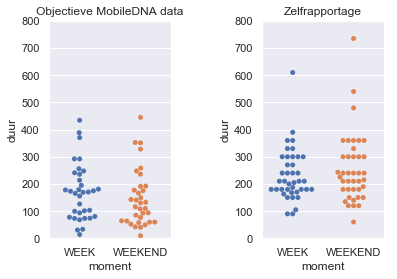

In [393]:
plt.subplots_adjust(wspace=0.75)
plt.subplot(121)
plt.title("Objectieve MobileDNA data")
plt.ylim([0, 800])
sns.swarmplot(x="moment", y="duur", data=urengebruik_long)

ay = plt.subplot(122)
plt.title("Zelfrapportage")
plt.ylim([0, 800])
sns.swarmplot(x="moment", y="duur", data=df_qualtrics_long)

Ook interessant: ratio van sessie die gestart zijn met notificatie: mensen met hoge ratio zou je kunnen zeggen dat ze snel afgeleid zijn en verwacht je dus slechtere prestatie op attentional span task. 

#### ALs je ze verder wil samen visualiseren moet je ze samen in long format plaatsen en zo aanpassen. 

Bijvoorbeeld een regressieplot zou wel interessant kunnen zijn. Hoe ziet het verloop eruit? 

Is er een significant verschil tussen de tijd die ze zelf schatten en de echte tijd? 

### Stap 6: verschil scores = zelfinschatting - objectieve data (wide format)

<b>positieve verschilscore: </b>participanten schatten hun gebruik hoger in dan ze echt gebruiken. 

<b>negatieve verschilscore: </b>participanten schatten hun gebruik lager in dan ze echt gebruiken. 

#### De twee plots naast elkaar zetten in de wide format. 

In [331]:
wideUse = pd.concat([urengebruik_wide, df_qualtrics_wide], axis=1)

In [332]:
wideUse.head(5)

,ppn,WEEK,WEEKEND,ppn,WEEK,WEEKEND
0,1.0,93.575857,59.394079,1,90,120
1,2.0,170.327992,258.377163,2,105,135
2,3.0,155.398902,149.627047,3,240,180
3,4.0,180.855594,142.894188,4,270,210
4,5.0,241.091306,235.971797,5,300,190


In [333]:
wideUse.to_excel("wideUse.xlsx")

Niet alle participanten die de vragenlijsten hebben ingevuld werden ook gelogd, daarom moeten de dataframe wat geherstructureerd worden voor je ze naast elkaar zet. 

In [339]:
wideUse = pd.read_excel("C:/Users/beheerder/wideUse.xlsx")

##### Nu kan je de verschilscores (voor week en weekend) berekenen. 

In [394]:
wideUse.head(5)

,ppn,WEEK,WEEKEND,WEEK.1,WEEKEND.1,verschilWEEK,verschilWEEKEND
0,1,93.575857,59.394079,90,120,-3.575857,60.605921
1,2,170.327992,258.377163,105,135,-65.327992,-123.377163
2,3,155.398902,149.627047,240,180,84.601098,30.372953
3,4,180.855594,142.894187,270,210,89.144406,67.105813
4,5,241.091306,235.971797,300,190,58.908694,-45.971797


Altijd zelfinschatting - objectieve data

In [341]:
wideUse["verschilWEEK"] = wideUse["WEEK.1"] - wideUse["WEEK"]

In [342]:
wideUse["verschilWEEKEND"] =  wideUse["WEEKEND.1"] - wideUse["WEEKEND"]

In [343]:
wideUse.head(5)

,ppn,WEEK,WEEKEND,WEEK.1,WEEKEND.1,verschilWEEK,verschilWEEKEND
0,1,93.575857,59.394079,90,120,-3.575857,60.605921
1,2,170.327992,258.377163,105,135,-65.327992,-123.377163
2,3,155.398902,149.627047,240,180,84.601098,30.372953
3,4,180.855594,142.894187,270,210,89.144406,67.105813
4,5,241.091306,235.971797,300,190,58.908694,-45.971797


In [345]:
wideUse[["verschilWEEK","verschilWEEKEND"]].describe()

,verschilWEEK,verschilWEEKEND
count,34.000000,34.000000
mean,49.336610,88.856594
std,89.848650,76.790806
min,-124.176603,-123.377163
25%,-11.054909,36.677435
50%,61.225475,82.334163
75%,104.270059,163.757297
max,226.814294,191.023767


Gemiddeld gezien komen er dus positieve verschilscores voor = overschatting bij rapportering. In de week is dit een gemiddelde overschatting van bijna 50 minuten, terwijl dit tijdens het weekend een overschatting dan van meer dan een uur en half is. 

In [396]:
leeg["verschilWEEK"] = wideUse["verschilWEEK"]
leeg["verschilWEEKEND"]  = wideUse["verschilWEEKEND"]

In [399]:
leeg.head(5)

,log,perdag_sec,meanUdag,meanMindag,meanAppsdag,verschilWEEK,verschilWEEKEND,meanMinWEEK,meanMinWEEKEND
ppn,,,,,,,,,
1,18,5128.896111,1.424693,85.481602,10.333333,-65.327992,-123.377163,170.327992,258.377163
2,14,11729.093857,3.258082,195.484898,24.500000,84.601098,30.372953,155.398902,149.627047
3,18,10244.489722,2.845692,170.741495,21.055556,89.144406,67.105813,180.855594,142.894188
4,12,10996.385500,3.054552,183.273092,23.000000,58.908694,-45.971797,241.091306,235.971797
5,17,15226.044588,4.229457,253.767410,27.352941,182.077992,184.915874,177.922008,175.084126


### Samenvatting: welke data kunnen we hier uit "leeg" halen per participant? 

<b>Per participant kan je er nu uithalen:</b>
<li>log: aantal dagen smartphone gebruik gelogd. </li>
<li>perdag_sec: aantal seconden de smartphone wordt gebruikt per dag. </li>
<li>meanUdag: gemiddeld aantal uren per dag smartphone gebruik</li>
<li>meanMindag: gemiddeld aantal minuten per dag smartphonegebruik</li>
<li>meanAppsdag: gemiddeld aantal apps gebruikt op een dag</li>
<li>meanMinWeek: gemiddeld aantal minuten smartphone per dag tijdens de week</li>
<li>meanMinWeekend: gemiddeld aantal minuten smartphone per dag tijdens weekend</li>
<li>verschilWEEK: verschil in subjectieve en objectieve gebruik per dag tijdens week</li>
<li>verschilWEEKEND: verschil in subjectieve en objectieve gebruik per dag tijdens weekend</li>

## Piekgebruik

Appevents per tijdsblok, zoals qualtricsvragenlijst: [23 - 5u], [5u - 9u] [9u - 12u], [12u-13u], [13u - 18u], [18u - 23u]

##### kolom "uur" aanmaken die weergeeft op welk uur een appevent is begonnen. Op basis van dat uur kunnen we dan de verschillende appevents van een persoon toekennen aan een categorie. 

In [248]:
df['uur'] = df.startTime.dt.hour
df.head(5)

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis,dag,duur,day,moment,uur
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.541525e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541525e+09,2018-11-06 18:31:16.853,1.541525e+12,2018-11-06,1.642,6.0,WEEK,18.0
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.541526e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541526e+09,2018-11-06 18:34:08.065,1.541526e+12,2018-11-06,114.998,6.0,WEEK,18.0
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.541615e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:24:54.966,1.541615e+12,2018-11-07,2.026,7.0,WEEK,19.0
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.541616e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:38:10.092,1.541616e+12,2018-11-07,2.528,7.0,WEEK,19.0
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.541628e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541628e+09,2018-11-07 23:04:03.090,1.541628e+12,2018-11-07,22.153,7.0,WEEK,23.0


##### Aantal appevents per uur? 

###### algemeen 

In [411]:
alg_u = df["uur"].value_counts().to_frame()
alg_u = alg_u.reset_index()
alg_u.columns = ["uur", "appevents"]
alg_u

,uur,appevents
0,19.0,6570
1,14.0,6454
2,17.0,6414
3,20.0,6392
4,18.0,6384
5,12.0,6230
6,13.0,5933
7,16.0,5740
8,15.0,5693
9,21.0,5612


###### proportie van de totale aantal appevents 

In [412]:
Tot_appevents = alg_u["appevents"].sum()

In [413]:
alg_u["propAppE"] = alg_u["appevents"]/Tot_appevents

In [433]:
alg_u = alg_u.sort_values(by="uur")

In [434]:
alg_u.head(5)

,uur,appevents,propAppE
16,0.0,2780,0.029058
18,1.0,1355,0.014163
19,2.0,908,0.009491
20,3.0,542,0.005665
22,4.0,242,0.002530


In [419]:
alg_u.dtypes

uur          float64
appevents      int64
propAppE     float64
dtype: object

In [440]:
alg_u["dagblok"] = ["23U-5U","23U-5U","23U-5U","23U-5U","23U-5U","5U-9U","5U-9U","5U-9U","5U-9U","9U-12U","9U-12U","9U-12U","12U-13U","13U-18U","13U-18U","13U-18U","13U-18U","13U-18U","18U-23U","18U-23U","18U-23U","18U-23U","18U-23U","23U-5U"]

In [441]:
alg_u

,uur,appevents,propAppE,dagblok
16,0.0,2780,0.029058,23U-5U
18,1.0,1355,0.014163,23U-5U
19,2.0,908,0.009491,23U-5U
20,3.0,542,0.005665,23U-5U
22,4.0,242,0.002530,23U-5U
23,5.0,129,0.001348,5U-9U
21,6.0,462,0.004829,5U-9U
17,7.0,1474,0.015407,5U-9U
15,8.0,3194,0.033386,5U-9U
14,9.0,3831,0.040044,9U-12U


##### proportie appevents per dagblok 

In [442]:
alg_u.groupby('dagblok')['appevents', 'propAppE'].sum()

,appevents,propAppE
dagblok,,
12U-13U,6230,0.065120
13U-18U,30234,0.316024
18U-23U,29758,0.311048
23U-5U,9841,0.102864
5U-9U,5259,0.054970
9U-12U,14348,0.149974


###### per participant

In [249]:
def set_blok(row):
    if row['uur'] == 23:
        return "23U-5U"
    if row['uur'] == 0:
        return "23U-5U"
    if row['uur']== 1:
        return"23U-5U"
    if row['uur']== 2:
        return"23U-5U"
    if row['uur']== 3:
        return"23U-5U"
    if row['uur']== 4:
        return"23U-5U"
    if row['uur']== 5:
        return"5U-9U"
    if row['uur']== 6:
        return"5U-9U"
    if row['uur']== 7:
        return"5U-9U"
    if row['uur']== 8:
        return"5U-9U"
    if row['uur']== 9:
        return"9U-12U"
    if row['uur']== 10:
        return"9U-12U"
    if row['uur']== 11:
        return"9U-12U"
    if row['uur']== 12:
        return"12U-13U"
    if row['uur']== 13:
        return"13U-18U"
    if row['uur']== 14:
        return"13U-18U"
    if row['uur']== 15:
        return"13U-18U"
    if row['uur']== 16:
        return"13U-18U"
    if row['uur']== 17:
        return"13U-18U"
    if row['uur']== 18:
        return"18U-23U"
    if row['uur']== 19:
        return"18U-23U"
    if row['uur']== 20:
        return"18U-23U"
    if row['uur']== 21:
        return"18U-23U"
    if row['uur']== 22:
        return"18U-23U"
df["uurblok"] = df.apply(set_blok, axis=1)
    


In [125]:
df.head(5)

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis,dag,duur,day,moment,uur,uurblok
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.541525e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541525e+09,2018-11-06 18:31:16.853,1.541525e+12,2018-11-06,1.642,6.0,WEEK,18.0,18U-23U
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.541526e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541526e+09,2018-11-06 18:34:08.065,1.541526e+12,2018-11-06,114.998,6.0,WEEK,18.0,18U-23U
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.541615e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:24:54.966,1.541615e+12,2018-11-07,2.026,7.0,WEEK,19.0,18U-23U
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.541616e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541615e+09,2018-11-07 19:38:10.092,1.541616e+12,2018-11-07,2.528,7.0,WEEK,19.0,18U-23U
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.541628e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1.541628e+09,2018-11-07 23:04:03.090,1.541628e+12,2018-11-07,22.153,7.0,WEEK,23.0,23U-5U


##### aantal appevents per uurblok per participant 

zit nog problemen in. 

In [482]:
totappevents = df["ppn"].value_counts().to_frame()

In [483]:
totappevents

,ppn
14,7847
27,7261
21,4839
16,4564
36,4318
2,4202
15,4158
13,4145
5,3813
10,3785


In [475]:
appeventsblokppn = df.groupby("ppn")["uurblok"].value_counts().to_frame()

In [477]:
appeventsblokppn.head()

uurblok
ppn uurblok         
1   18U-23U      319
    13U-18U      306
    9U-12U       155
    23U-5U        80
    12U-13U       41

In [479]:
appeventsblokppn.columns = ["appevents"]

In [480]:
appeventsblokppn = appeventsblokppn.reset_index()

In [484]:
appeventsblokppn

,ppn,uurblok,appevents
0,1,18U-23U,319
1,1,13U-18U,306
2,1,9U-12U,155
3,1,23U-5U,80
4,1,12U-13U,41
5,1,5U-9U,27
6,2,18U-23U,1200
7,2,13U-18U,1025
8,2,9U-12U,736
9,2,23U-5U,655


##### naar wide

In [486]:
appeventsblokppn.pivot(index='ppn', columns='uurblok', values='appevents')

uurblok,12U-13U,13U-18U,18U-23U,23U-5U,5U-9U,9U-12U
ppn,,,,,,
1,41,306,319,80,27,155
2,142,1025,1200,655,444,736
3,100,669,710,450,201,452
4,114,616,765,372,193,602
5,232,1200,1202,566,183,430
6,242,928,778,294,222,473
8,241,954,917,317,65,444
9,155,575,530,117,121,327
10,243,908,1214,284,409,727


In [488]:
totappevents = totappevents.reset_index()

In [493]:
totappevents.columns = ["ppn","totappevents"]

In [494]:
totappevents

,ppn,totappevents
0,14,7847
1,27,7261
2,21,4839
3,16,4564
4,36,4318
5,2,4202
6,15,4158
7,13,4145
8,5,3813
9,10,3785


In [497]:
totappevents = totappevents.sort_values(["ppn"])
totappevents

,ppn,totappevents
32,1,928
5,2,4202
21,3,2582
18,4,2662
8,5,3813
15,6,2937
14,8,2938
23,9,1825
9,10,3785
30,11,1279


##### aantal minuten gebruikt per uurblok

In [450]:
mm = df.groupby(['ppn','uurblok'])['duur'].sum()/60
piek = mm.groupby(['ppn', 'uurblok']).mean()
piek

ppn  uurblok
1    12U-13U      82.792567
     13U-18U     325.800117
     18U-23U     408.877817
     23U-5U      317.424933
     5U-9U        91.217800
     9U-12U      312.555600
2    12U-13U      45.946550
     13U-18U     540.210517
     18U-23U     779.864483
     23U-5U      606.972767
     5U-9U       340.140900
     9U-12U      423.653350
3    12U-13U     240.455233
     13U-18U     821.587700
     18U-23U     827.280233
     23U-5U      523.476683
     5U-9U       236.172550
     9U-12U      424.374517
4    12U-13U     120.987567
     13U-18U     500.609617
     18U-23U     635.420800
     23U-5U      317.201267
     5U-9U       216.315050
     9U-12U      408.742800
5    12U-13U     171.351017
     13U-18U    1368.027950
     18U-23U    1257.566833
     23U-5U      843.106650
     5U-9U       152.870800
     9U-12U      521.122717
                   ...     
33   12U-13U     114.414517
     13U-18U     456.966400
     18U-23U     356.487517
     23U-5U      183.104567
     5U

In [451]:
piekgebruik = pd.DataFrame(data=piek)

In [456]:
piekgebruik=piekgebruik.reset_index()

##### piekgebruik naar wide 

In [464]:
piekgebruik_wide = piekgebruik.pivot(index='ppn', columns='uurblok', values='duur')

In [466]:
piekgebruik_wide

uurblok,12U-13U,13U-18U,18U-23U,23U-5U,5U-9U,9U-12U
ppn,,,,,,
1,82.792567,325.800117,408.877817,317.424933,91.217800,312.555600
2,45.946550,540.210517,779.864483,606.972767,340.140900,423.653350
3,240.455233,821.587700,827.280233,523.476683,236.172550,424.374517
4,120.987567,500.609617,635.420800,317.201267,216.315050,408.742800
5,171.351017,1368.027950,1257.566833,843.106650,152.870800,521.122717
6,205.763350,928.859700,867.289033,547.829033,275.787917,713.045950
8,261.696150,989.002283,1519.513133,449.925833,59.905750,495.825033
9,128.647933,604.001967,943.459950,405.529283,96.719567,354.562883
10,229.885833,1007.575383,1087.059450,529.527000,316.748533,745.793917


In [467]:
piekgebruik_wide.to_excel("piekgebruikMobileDNA.xlsx")

Je krijgt hiermee dus een idee van gemiddelde aantal minuten gebruik tijdens een blok. 
Dit is misschien nog niet volledig de juiste redenering en moet er eigenlijk naar iets anders worden gekeken: proportie appevents per blok? 

Wat kan ik hier nu verder mee doen? Zijn de blokken die ze hebben aangeduid inderdaad het belangrijkst? 

#### via heatmap krijg je per participant een overzicht van waar de nadruk steeds ligt. 

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5]),
 <a list of 17 Text yticklabel objects>)

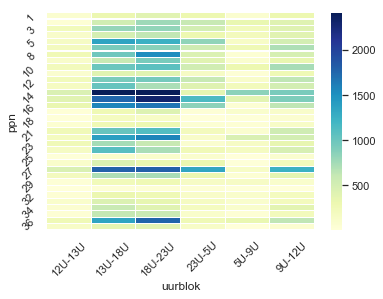

In [551]:
sns.heatmap(piekgebruik_wide, cmap="YlGnBu", linewidths=.1)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

#### Hoe kan je hiervoor een inschatting berekenen?

#### We kunnen ook een heatmap verkrijgen met een appevent heatmap per dag van de week: heatmap voor alle respondenten samen 

In [396]:
# Appevent heatmap, uur en dag van de week?
df['dag'] = df['startTime'].dt.weekday_name
days_arr = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

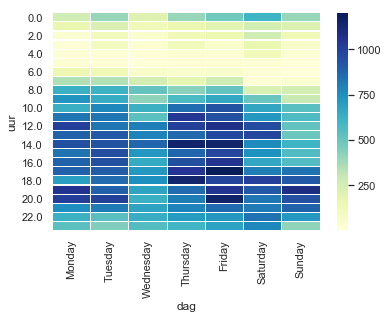

In [397]:
df_heat = df.groupby(["uur", "dag"])["application"].size().reset_index()
df_heat2 = df_heat.pivot("uur", "dag", "application")
df_heat2 = df_heat2.reindex(days_arr, axis=1)
sns.heatmap(df_heat2, cmap="YlGnBu", linewidths=.1)

## appgebruik

In [ ]:
Per participant de 3 top drie belangrijkste apps krijgen. 

### Eerst moeten de apps gecategoriseerd worden naar de categorieeën zoals in de vragenlijst

<ul>
<li>INTERNET/ZOEK</li>
<li>MESSENGERS: COMMUNICATION</li>
<li>SNS: SOCIAL</li>
<li>ENTERTAIN: ENTERTAINMENT, MUSIC, VIDEO PLAYERS</li>
<li>GAMES: GAME_ARCADE</li>
<li>ANDERE</li>
</ul>

In [250]:
cache_path = "D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/"
app_dict = np.load(cache_path + "app_dict.npy").item()

In [251]:
# Apps categoriseren met script Wouter, licht aangepast
def annotate(df: pd.DataFrame, app_dict: dict, type:str, lookup=False) -> (pd.DataFrame, dict):
    """Annotate virgin data with duration, app meta data."""

    # Does the data frame contain an application column? If not, bugger off.
    if "application" not in df:
        raise Exception("Need an application column to be able to annotate")

    # If lookup is set to True, update app data base, otherwise work locally
    if lookup:
        update_app_meta(df=df, app_dict=app_dict)

    # Store unclassified apps, and how much they occur
    unclassified = {}

    # Subroutine to get genre
    def get_genre_id(row):
        try:
            genre = app_dict[row['application']]['genre_id']
        except:
            genre = 'unknown'
        return genre

    # Subroutine to get app name (no spaces)
    def get_app_name(row, sep="_"):
        try:
            name = app_dict[row['application']]['app_name'].replace(" ", sep)
        except:
            name = 'unknown'
            if row['application'] in unclassified:
                unclassified[row['application']] += 1
            else:
                unclassified[row['application']] = 1
        return name

    # Annotate actual data frame
    try:
        df['app_genre_id'] = df.apply(lambda row: get_genre_id(row), axis=1)
        df['app_name'] = df.apply(lambda row: get_app_name(row), axis=1)
    except Exception as e:
        print("Annotations failed! - ", e)

    return df, unclassified

In [252]:
df_new, unclassified = annotate(df, app_dict=app_dict, type="appevents", lookup=False)

In [253]:
df_new['datum'] = df_new['startTime'].dt.date
df_new['duur'] = (df_new['endTimeMillis'] - df_new['startTimeMillis']) / 1000

In [254]:
df_new.head()

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,...,startTimeMillis,dag,duur,day,moment,uur,uurblok,app_genre_id,app_name,datum
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.541525e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,1.541525e+12,2018-11-06,1.642,6.0,WEEK,18.0,18U-23U,LIFESTYLE,Tinder,2018-11-06
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.541526e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,1.541526e+12,2018-11-06,114.998,6.0,WEEK,18.0,18U-23U,LIFESTYLE,Tinder,2018-11-06
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.541615e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,1.541615e+12,2018-11-07,2.026,7.0,WEEK,19.0,18U-23U,SOCIAL,Instagram,2018-11-07
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.541616e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,1.541616e+12,2018-11-07,2.528,7.0,WEEK,19.0,18U-23U,unknown,unknown,2018-11-07
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.541628e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,1.541628e+12,2018-11-07,22.153,7.0,WEEK,23.0,23U-5U,COMMUNICATION,Messenger_–_Text_and_Video_Chat_for_Free,2018-11-07


De lege categorieën = vaak oneplus gallery = PHOTOGRAPHY
voor in de paper definiëren: 
    * welke app_names vallen onder welke categorie? 
    * welke categorieën vallen onder welke categorieën in de vragenlijst. 

Proberen om Google_Chrome:_Fast_&_Secure in  INTERNET/ZOEK als genre te krijgen. 

<ul>
<li>INTERNET/ZOEK: MAPS_AND_NAVIGATION</li>
<li>MESSENGERS: COMMUNICATION</li>
<li>SNS: SOCIAL</li>
<li>ENTERTAIN: ENTERTAINMENT, MUSIC_AND_AUDIO, VIDEO PLAYERS, PHOTOGRAPHY, SPORTS</li>
<li>GAMES: GAME_ARCADE</li>
<li>ANDERE: FINANCE, HEALTH_AND_FITNESS, LIFESTYLE, NEWS_AND_MAGAZINES, SHOPPING, TOOLS, TRAVEL_AND_LOCAL, unknown</li>
</ul>

In [255]:
def internet(row):
    if row["app_name"] == "Google_Chrome:_Fast_&_Secure":
        return "INTERNET/ZOEK"
    if row["app_name"] == "OnePlus_Gallery":
        return "ENTERTAIN"
    if row["app_genre_id"] == "MAPS_AND_NAVIGATION":
        return "INTERNET/ZOEK"
    if row["app_genre_id"] == "COMMUNICATION":
        return "MESSENGERS"
    if row["app_genre_id"] == "SOCIAL":
        return "SNS"
    if row["app_genre_id"] == "ENTERTAINMENT":
        return "ENTERTAIN"
    if row["app_genre_id"] == "MUSIC_AND_AUDIO":
        return "ENTERTAIN"
    if row["app_genre_id"] == "VIDEO PLAYERS":
        return "ENTERTAIN"
    if row["app_genre_id"] == "PHOTOGRAPHY":
        return "ENTERTAIN"
    if row["app_genre_id"] == "SPORTS":
        return "ENTERTAIN"
    if row["app_genre_id"] == "GAME_ARCADE":
        return "GAMES"
    if row["app_genre_id"] == "FINANCE":
        return "ANDERE"
    if row["app_genre_id"] == "HEALTH_AND_FITNESS":
        return "ANDERE"
    if row["app_genre_id"] == "LIFESTYLE":
        return "ANDERE"
    if row["app_genre_id"] == "NEWS_AND_MAGAZINES":
        return "ANDERE"
    if row["app_genre_id"] == "SHOPPING":
        return "ANDERE"
    if row["app_genre_id"] == "TOOLS":
        return "ANDERE"
    if row["app_genre_id"] == "PRODUCTIVITY":
        return "ANDERE"
    if row["app_genre_id"] == "TRAVEL_AND_LOCAL":
        return "ANDERE"
    if row["app_genre_id"] == "unknown":
        return "ANDERE"
df_new["qualcatapp"] = df_new.apply(internet, axis=1)

In [537]:
df_new.to_excel("dfnew.xlsx")

In [26]:
df_new.head(5)

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,...,startTimeMillis,dag,duur,day,moment,uur,app_genre_id,app_name,datum,qualcatapp
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.541525e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,1.541525e+12,2018-11-06,1.642,6.0,WEEK,18.0,LIFESTYLE,Tinder,2018-11-06,ANDERE
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.541526e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,1.541526e+12,2018-11-06,114.998,6.0,WEEK,18.0,LIFESTYLE,Tinder,2018-11-06,ANDERE
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.541615e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,1.541615e+12,2018-11-07,2.026,7.0,WEEK,19.0,SOCIAL,Instagram,2018-11-07,SNS
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.541616e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,1.541616e+12,2018-11-07,2.528,7.0,WEEK,19.0,unknown,unknown,2018-11-07,ANDERE
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.541628e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,1.541628e+12,2018-11-07,22.153,7.0,WEEK,23.0,COMMUNICATION,Messenger_–_Text_and_Video_Chat_for_Free,2018-11-07,MESSENGERS


Dus op 3 niveaus zullen we idee krijgen van welke apps ze gebruiken: (1) app_genre_id, (2) app_name, (3) categorie vragenlijst

##### (1) aantal appevents per participant, per app_genre_id gedeeld door aantal dagen dat categorie gelogd is. 

In [511]:
app_genre_id_long = df_new.groupby(['ppn','datum'])['app_genre_id'].value_counts().groupby(['ppn','app_genre_id']).mean().to_frame()
app_genre_id_long.columns = ["mean app events"]
app_genre_id_long = app_genre_id_long.reset_index()

In [511]:
app_genre_id_long.head()

,ppn,app_genre_id,mean app events
0,1,COMMUNICATION,6.200000
1,1,LIFESTYLE,31.444444
2,1,MAPS_AND_NAVIGATION,1.000000
3,1,MUSIC_AND_AUDIO,1.000000
4,1,PHOTOGRAPHY,7.666667


In [514]:
app_genre_id_wide = app_genre_id_long.pivot(index="ppn", columns="app_genre_id", values = "mean app events")
app_genre_id_wide

app_genre_id,,COMMUNICATION,ENTERTAINMENT,FINANCE,GAME_ARCADE,HEALTH_AND_FITNESS,LIFESTYLE,MAPS_AND_NAVIGATION,MUSIC_AND_AUDIO,NEWS_AND_MAGAZINES,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,unknown
ppn,,,,,,,,,,,,,,,,,,,
1,NaN,6.200000,NaN,NaN,NaN,NaN,31.444444,1.000000,1.000000,NaN,7.666667,1.000000,NaN,7.941176,NaN,1.333333,3.333333,2.000000,21.882353
2,1.600000,42.142857,NaN,4.000000,NaN,NaN,2.000000,13.375000,11.692308,18.071429,1.500000,5.583333,NaN,37.285714,14.428571,1.571429,6.571429,2.000000,156.928571
3,NaN,33.529412,1.666667,2.533333,NaN,NaN,1.500000,1.000000,4.000000,2.636364,4.071429,3.285714,NaN,37.882353,NaN,3.500000,3.800000,3.000000,65.235294
4,NaN,42.416667,NaN,NaN,NaN,NaN,1.500000,5.000000,9.555556,1.000000,1.000000,1.000000,NaN,56.000000,NaN,2.250000,1.571429,2.125000,112.166667
5,NaN,15.588235,NaN,NaN,NaN,NaN,2.375000,2.000000,2.400000,1.333333,NaN,3.090909,1.000000,67.647059,NaN,6.222222,4.625000,10.562500,120.647059
6,NaN,24.647059,NaN,1.000000,NaN,NaN,2.666667,2.200000,6.818182,2.500000,NaN,14.923077,2.250000,19.823529,NaN,3.545455,7.600000,3.363636,101.882353
8,NaN,49.705882,NaN,1.750000,NaN,NaN,1.200000,NaN,NaN,NaN,2.857143,3.076923,NaN,56.764706,NaN,2.666667,2.666667,4.400000,56.294118
9,NaN,17.176471,1.333333,1.600000,NaN,NaN,2.000000,1.000000,6.400000,3.357143,2.500000,3.800000,NaN,24.000000,NaN,2.818182,2.375000,4.200000,47.941176
10,NaN,32.000000,2.500000,2.000000,NaN,NaN,5.000000,1.875000,13.066667,6.200000,NaN,6.125000,NaN,31.647059,NaN,3.333333,6.428571,5.600000,124.117647


In [516]:
app_genre_id_wide.to_excel("app_genre_id_wide.xlsx")

##### (2) aantal appevents per participant, per app_name gedeeld door aantal dagen dat categorie gelogd is. 

In [517]:
app_name_long = df_new.groupby(['ppn','datum'])['app_name'].value_counts().groupby(['ppn','app_name']).mean().to_frame()
app_name_long.columns = ["mean app events"]
app_name_long = app_name_long.reset_index()

In [519]:
app_name_long.head()

,ppn,app_name,mean app events
0,1,Facebook,1.500000
1,1,Google,2.000000
2,1,Google_Calendar,1.000000
3,1,Google_Chrome:_Fast_&_Secure,3.583333
4,1,Google_Drive,1.000000


In [520]:
app_name_wide = app_name_long.pivot(index="ppn", columns="app_name", values = "mean app events")

In [521]:
app_name_wide

app_name,AZ_Screen_Recorder_-_No_Root,Adobe_Acrobat_Reader,Bancontact,"Blue_Light_Filter_-_Night_Mode,_Eye_Care",DeMorgen.be_Mobile,De_Standaard-_Krant_&_dS_Avond,Device_Maintenance,Dropbox,Easy_Banking_App,"Evernote_–_Take_Notes,_Plan,_Organize",...,Viking_App_(Official),"Waze_-_GPS,_Maps,_Traffic_Alerts_&_Live_Navigation",WhatsApp_Messenger,Yelo_Play,YouTube,bol.com,itsme,mobileDNA,musical.ly,unknown
ppn,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,2.000000,NaN,NaN,1.666667,NaN,21.882353
2,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1.000000,...,NaN,9.333333,6.692308,3.0,1.666667,NaN,NaN,2.000000,NaN,156.928571
3,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,2.533333,7.000000,...,NaN,NaN,13.352941,NaN,3.000000,NaN,NaN,1.500000,NaN,65.235294
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12.800000,NaN,2.125000,NaN,NaN,1.500000,NaN,112.166667
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,10.562500,1.000000,NaN,2.375000,NaN,120.647059
6,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,...,NaN,NaN,3.666667,NaN,3.363636,2.250000,NaN,2.666667,NaN,101.882353
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,1.200000,NaN,56.294118
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.600000,NaN,4.200000,NaN,NaN,2.000000,NaN,47.941176
10,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.733333,NaN,5.600000,NaN,NaN,5.000000,NaN,124.117647


In [522]:
app_name_wide.to_excel("specifieke_app_wide.xlsx")

###### per participant top 5 van de meest gebruikte apps 

In [563]:
top5_test = df_new.groupby(['ppn','application', 'app_name'])['duur'].sum().reset_index()
top5 = top5_test.groupby('ppn')['duur'].nlargest(5).reset_index()
top5

,ppn,level_1,duur
0,1,27,25388.333
1,1,35,18246.803
2,1,28,13472.187
3,1,4,13020.013
4,1,24,6451.432
5,2,49,45661.476
6,2,89,25117.919
7,2,65,19551.342
8,2,44,17334.846
9,2,53,16235.104


In [564]:
df_top5 = pd.merge(top5, top5_test[['application','app_name']], left_on='level_1', right_index=True)
df_top5

,ppn,level_1,duur,application,app_name
0,1,27,25388.333,com.instagram.android,Instagram
1,1,35,18246.803,com.tinder,Tinder
2,1,28,13472.187,com.notabasement.mangarock.android.titan,unknown
3,1,4,13020.013,com.android.chrome,Google_Chrome:_Fast_&_Secure
4,1,24,6451.432,com.google.android.youtube,YouTube
5,2,49,45661.476,com.android.chrome,Google_Chrome:_Fast_&_Secure
6,2,89,25117.919,com.snapchat.android,Snapchat
7,2,65,19551.342,com.fwc2014.vrt.and,Sporza
8,2,44,17334.846,be.vrt.mobile.android.deredactie,VRT_NWS
9,2,53,16235.104,com.android.mms,unknown


In [566]:
df_top5["volgorde"] = ["nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5",
                      "nr1", "nr2", "nr3", "nr4", "nr5","nr1", "nr2", "nr3", "nr4", "nr5"]
df_top5

,ppn,level_1,duur,application,app_name,volgorde
0,1,27,25388.333,com.instagram.android,Instagram,nr1
1,1,35,18246.803,com.tinder,Tinder,nr2
2,1,28,13472.187,com.notabasement.mangarock.android.titan,unknown,nr3
3,1,4,13020.013,com.android.chrome,Google_Chrome:_Fast_&_Secure,nr4
4,1,24,6451.432,com.google.android.youtube,YouTube,nr5
5,2,49,45661.476,com.android.chrome,Google_Chrome:_Fast_&_Secure,nr1
6,2,89,25117.919,com.snapchat.android,Snapchat,nr2
7,2,65,19551.342,com.fwc2014.vrt.and,Sporza,nr3
8,2,44,17334.846,be.vrt.mobile.android.deredactie,VRT_NWS,nr4
9,2,53,16235.104,com.android.mms,unknown,nr5


In [567]:
df_top5 = df_top5[["ppn", "volgorde", "application", "duur"]]

In [568]:
df_top5_wide = df_top5.pivot(index="ppn", columns="volgorde", values="application" )

In [569]:
df_top5_wide

volgorde,nr1,nr2,nr3,nr4,nr5
ppn,,,,,
1,com.instagram.android,com.tinder,com.notabasement.mangarock.android.titan,com.android.chrome,com.google.android.youtube
2,com.android.chrome,com.snapchat.android,com.fwc2014.vrt.and,be.vrt.mobile.android.deredactie,com.android.mms
3,com.jagex.oldscape.android,com.instagram.android,com.facebook.orca,com.snapchat.android,com.samsung.android.messaging
4,com.instagram.android,com.snapchat.android,com.android.mms,com.facebook.orca,com.facebook.katana
5,com.instagram.android,com.google.android.youtube,edu.cornell.gdiac.underhand,com.snapchat.android,com.nitrome.leapday
6,org.mozilla.firefox,com.facebook.katana,com.tinyco.potter,com.pinterest,org.readera
8,com.facebook.katana,com.google.android.youtube,com.facebook.orca,com.instagram.android,com.sec.android.app.sbrowser
9,com.google.android.youtube,com.instagram.android,com.facebook.katana,com.sec.android.app.sbrowser,com.twitter.android
10,com.google.android.youtube,com.facebook.katana,com.instagram.android,com.facebook.orca,com.android.chrome


###### top 5 algemeen (over alle participanten heen)


In [570]:
top5_alg = df_new.groupby(['application', 'app_name'])['duur'].sum().reset_index()

In [571]:
top5_alg

,application,app_name,duur
0,MyING.be,unknown,1944.262
1,android,unknown,1448.858
2,app.screen.off,unknown,1208.560
3,badminton.king.sportsgame.smash,unknown,5.083
4,ballz.magiplay.bricks.breaker.ballz.balls.boun...,unknown,40.453
5,be.argenta.bankieren,unknown,2479.240
6,be.axa.mobilebanking,unknown,311.911
7,be.basecompany.base.mybase,unknown,118.763
8,be.belfius.directmobile.android,unknown,3372.257
9,be.bmid.itsme,itsme,13.424


In [574]:
top5_A = top5_alg['duur'].nlargest(5).reset_index()

In [575]:
top5_A

,index,duur
0,144,837515.109
1,187,688255.740
2,219,573154.856
3,145,415724.353
4,56,376118.672


In [578]:
df_top5_A = pd.merge(top5_A, top5_alg[['application','app_name']], left_on='index', right_index=True)
df_top5_A

,index,duur,application,app_name
0,144,837515.109,com.facebook.katana,Facebook
1,187,688255.740,com.google.android.youtube,YouTube
2,219,573154.856,com.instagram.android,Instagram
3,145,415724.353,com.facebook.orca,Messenger_–_Text_and_Video_Chat_for_Free
4,56,376118.672,com.android.chrome,Google_Chrome:_Fast_&_Secure


Dus de top 5 die eruit is gekomen:(1) Facebook, (2) Youtube, (3) Instagram, (4) Messenger, (5) Google Chrome

##### (3) aantal appevents per participant, per app_categorie gedeeld door aantal dagen dat categorie gelogd is. 

In [542]:
app_qualtrics_long = df_new.groupby(['ppn','datum'])['qualcatapp'].value_counts().groupby(['ppn','qualcatapp']).mean().to_frame()
app_qualtrics_long.columns = ["mean app events"]

In [543]:
app_qualtricslong = app_qualtrics_long.reset_index()

In [545]:
app_qualtricslong.sort_values(by=["ppn","mean app events"])

,ppn,qualcatapp,mean app events
2,1,INTERNET/ZOEK,3.666667
3,1,MESSENGERS,5.000000
4,1,SNS,7.941176
1,1,ENTERTAIN,8.000000
0,1,ANDERE,39.470588
8,2,MESSENGERS,19.307692
6,2,ENTERTAIN,26.071429
7,2,INTERNET/ZOEK,31.857143
9,2,SNS,37.285714
5,2,ANDERE,186.428571


In [546]:
app_qualtrics_wide = app_qualtricslong.pivot(index="ppn", columns="qualcatapp", values = "mean app events")
app_qualtrics_wide

qualcatapp,ANDERE,ENTERTAIN,GAMES,INTERNET/ZOEK,MESSENGERS,SNS
ppn,,,,,,
1,39.470588,8.000000,NaN,3.666667,5.000000,7.941176
2,186.428571,26.071429,NaN,31.857143,19.307692,37.285714
3,73.058824,6.875000,NaN,3.533333,30.470588,37.882353
4,114.333333,9.666667,NaN,4.125000,40.083333,56.000000
5,129.588235,2.400000,NaN,6.687500,9.411765,67.647059
6,121.058824,6.818182,NaN,10.000000,17.058824,19.823529
8,61.294118,2.857143,NaN,3.250000,47.411765,56.764706
9,57.529412,5.533333,NaN,2.083333,15.764706,24.000000
10,140.764706,13.187500,NaN,10.562500,22.941176,31.647059


In [547]:
app_qualtrics_wide.to_excel("appqualtricswide.xlsx")

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5]),
 <a list of 17 Text yticklabel objects>)

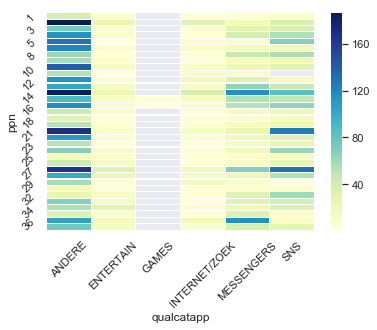

In [553]:
sns.heatmap(app_qualtrics_wide, cmap="YlGnBu", linewidths=.1)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

## NOG VERDER DOEN: Gewoontes in smartphonegebruik: gebruik op school

Afhankelijk van hoe vaak men aangeeft dat men zijn smartphone heeft gebruikt op school (hoeveel dagen in de week?) ~ proportie van aantal sessies terwijl ze op school waren/totale aantal sessies (per dag).

### Welke apps meestal Thuis (gezien als na 8u en voor 19u (gokje))

In [141]:
df['locatie'] = np.where((df.uur > 8) & (df.uur < 19), 'school', 'thuis')
df2 = pd.DataFrame(df[['ppn','session','application','locatie','uur']])
appsThuis = df2[df2.locatie == 'thuis']

df3 = pd.DataFrame(appsThuis.groupby('application')['session'].count())
df3.sort_values('session', ascending=False)[:30]

,session
application,
com.facebook.orca,4644
com.android.systemui,3902
com.facebook.katana,3856
com.instagram.android,3013
com.snapchat.android,2349
com.android.mms,2021
com.whatsapp,1877
com.android.chrome,1787
com.spotify.music,1093


### Welke apps meestal "op school" (tussen 8 en 19u)

In [142]:
df['uur'] = df.endTime.dt.hour
df['locatie'] = np.where((df.uur < 8) & (df.uur > 19), 'school', 'thuis')
df2 = pd.DataFrame(df[['ppn','session','application','locatie','uur']])
appsSchool = df2[df2.locatie == 'school']

df3 = pd.DataFrame(appsThuis.groupby('application')['session'].count())
df3.sort_values('session', ascending=False)[:30]

,session
application,
com.facebook.orca,4644
com.android.systemui,3902
com.facebook.katana,3856
com.instagram.android,3013
com.snapchat.android,2349
com.android.mms,2021
com.whatsapp,1877
com.android.chrome,1787
com.spotify.music,1093


## Multitasking

Idee om multitasking aan te pakken: 
(1) Multitasking wordt gezien als het feit van smartphone multitasking: namelijk het gebruik van de smartphone terwijl de participanten eigenlijk aangeven dat ze op school zijn én dat de coordinaten inderdaad bevestigen dat ze op school zijn.</li> 
<li> Via de agenda krijgen we op maximaal een half uur nauwkeurigheid of ze op school waren: natuurlijk is het zelfrapportage en speelt sociale wenselijkheid daar een rol.</li> <br>
    => agenda toekennen gebeurt: op basis van "day", "uur" en "minuut" (deze laatste nog eruit halen)
<li> Via de coördinaten kun je een tweede kolom aangeven of ze op school of thuis waren. De dagen in het weekend moeten al niet bekeken worden.</li>
<li> daarna worden de 2 kolommen vergeleken; als beide kolommen aangeven dat ze op school "zouden moeten zijn" heb je een check dat ze inderdaad op school waren.</li>
Per participant wordt dan gekeken hoeveel appevents ze gemiddeld hebben wanneer ze op school zijn (gedeeld door het aantal uren en dagen dat ze op school zijn geweest zodat iemand die meer op school was ook niet als meer multitasker wordt gezien.)


In [2]:
df_new.head()

NameError: name 'df_new' is not defined

### Minuut moet toegevoegd worden aan de dataframe

In [256]:
df_new["minuut"] = df_new.startTime.dt.minute

### Agenda inlezen en in wide format zetten. (1) kolom "ppn", (2) kolom "moment", (3) activiteit

informatie in kolom "moment": titel staat voor het eindmoment van dat blok. bvb. 00u30 loopt van 00u00 tot 00u30.

In [134]:
agenda_wide = pd.read_excel("D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/experiment verloop/agenda.xlsx")

In [135]:
agenda_wide.head(5)

,ppn,5/11 00u30,5/11 1u,5/11 1u30,5/11 2u,5/11 2u30,5/11 3u,5/11 3u30,5/11 4u,5/11 4u30,...,16/11 19u,16/11 19u30,16/11 20u,16/11 20u30,16/11 21u,16/11 21u30,16/11 22u,16/11 22u30,16/11 23u,16/11 23u30
0,1,/,/,/,/,/,/,/,/,/,...,/,/,/,/,/,/,/,/,/,/
1,2,/,/,/,/,/,/,/,/,/,...,/,/,/,/,/,/,/,/,/,/
2,3,/,/,/,/,/,/,/,/,/,...,/,/,/,/,/,/,/,/,/,/
3,4,/,/,/,/,/,/,/,/,/,...,/,/,/,/,/,/,/,/,/,/
4,5,/,/,/,/,/,/,/,/,/,...,/,/,/,/,/,/,/,/,/,/


In [136]:
agenda_long = pd.melt(agenda_wide, id_vars = ["ppn"], var_name = "moment", value_name = "activiteit")

In [137]:
agenda_long.head(5)

,ppn,moment,activiteit
0,1,5/11 00u30,/
1,2,5/11 00u30,/
2,3,5/11 00u30,/
3,4,5/11 00u30,/
4,5,5/11 00u30,/


In [138]:
agenda_long.dtypes

ppn            int64
moment        object
activiteit    object
dtype: object

#### De "moment" kolom moet gesplitst worden om zo dag, uur en minuut eruit te halen. 

(1) splits te de kolom obv een spatie in dag en tijdstip. 

In [139]:
stap1 = agenda_long["moment"].str.split(' ', 1, expand = True).rename(columns ={0: "datum", 1:"tijdstip"})

(2) splits de datum kolom puur in dag obv '/'

In [140]:
stap2 = stap1["datum"].str.split('/',1,expand=True).rename(columns={0:'dag', 1:'maand'})
stap2.head(5)

,dag,maand
0,5,11
1,5,11
2,5,11
3,5,11
4,5,11


(3) splits de tijdstip kolom in uur (voor u) en minuut (na u)

In [141]:
stap3 = stap1["tijdstip"].str.split('u',1,expand=True).rename(columns={0:'uur', 1:'minuut'})

(4) Zet die drie dataframes samen. 

In [142]:
agenda_long = pd.concat([stap1, stap2, stap3, agenda_long], axis=1)

In [143]:
agenda_long.head(5)

,datum,tijdstip,dag,maand,uur,minuut,ppn,moment,activiteit
0,5/11,00u30,5,11,00,30,1,5/11 00u30,/
1,5/11,00u30,5,11,00,30,2,5/11 00u30,/
2,5/11,00u30,5,11,00,30,3,5/11 00u30,/
3,5/11,00u30,5,11,00,30,4,5/11 00u30,/
4,5/11,00u30,5,11,00,30,5,5/11 00u30,/


In [144]:
agenda_long = agenda_long[["ppn", "dag","uur", "minuut", "activiteit"]]

In [145]:
agenda_long.head()

,ppn,dag,uur,minuut,activiteit
0,1,5,00,30,/
1,2,5,00,30,/
2,3,5,00,30,/
3,4,5,00,30,/
4,5,5,00,30,/


In [146]:
agenda_long = agenda_long.sort_values(by="ppn")

Het is belangrijk dat alles TOT die minuut ertussen moet vallen dus alles kleiner dan 00u30 bvb. 

In [147]:
agenda_long.head()

,ppn,dag,uur,minuut,activiteit
0,1,5,00,30,/
3280,1,6,17,30,/
15680,1,15,4,30,/
3320,1,6,18,,/
15640,1,15,4,,/


#### Definitie aanmakken om de activiteit te koppelen met de MobileDNA: twee dataframes definiëren in functie.  

In [ ]:
def agenda(row, row1):
row = agenda_long
row1 = df_new
if row['dag'] == row1['day']:
    if row['uur'] == row1['uur']:
        if row['min'] >= row1['minuut']:
            row1["activiteit_agenda"] = row["activiteit"]

### Adres van coördinaten berekenen. 

In [78]:
from geopy.geocoders import Nominatim

In [79]:
geolocator = Nominatim()

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


#### Eerst alle coordinaten als string krijgen om dan in de gelocator functie in te putten. 

In [80]:
df_new["coordinaten"] = df["latitude"].astype(str)+','+ df["longitude"].astype(str)

In [81]:
df_new.head(5)

,ppn,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,...,moment,uur,uurblok,app_genre_id,app_name,datum,duur,qualcatapp,minuut,coordinaten
0,1,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1.541525e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,WEEK,18.0,18U-23U,LIFESTYLE,Tinder,2018-11-06,1.642,ANDERE,31.0,"0.0,0.0"
1,1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1.541526e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,WEEK,18.0,18U-23U,LIFESTYLE,Tinder,2018-11-06,114.998,ANDERE,34.0,"0.0,0.0"
2,1,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1.541615e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,WEEK,19.0,18U-23U,SOCIAL,Instagram,2018-11-07,2.026,SNS,24.0,"0.0,0.0"
3,1,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1.541616e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,WEEK,19.0,18U-23U,unknown,unknown,2018-11-07,2.528,ANDERE,38.0,"0.0,0.0"
4,1,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1.541628e+12,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,...,WEEK,23.0,23U-5U,COMMUNICATION,Messenger_–_Text_and_Video_Chat_for_Free,2018-11-07,22.153,MESSENGERS,4.0,"0.0,0.0"


#### Per locatie adres krijgen. 

In [ ]:
location = geolocator.reverse("51.0528068,3.7054173", addressdetails = True)

In [ ]:
print(location.address)

In [99]:
from geopy.extra.rate_limiter import RateLimiter

In [100]:
geocode=RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [ ]:
if ((df_new["latitude"] != 0) & (df_new["longitude"] != 0)) & (df_new["moment"] == "WEEK") & ((df_new["uur"] > 8) & (df_new["uur"] < 19)):
    df_new['adres'] = df_new['coordinaten'].progress_apply(geocode)

In [ ]:
geocode=RateLimiter(geolocator.geocode, min_delay_seconds=1)
def coordinaten(row):
    global location
    if ((row["latitude"] != 0) & (row["longitude"] != 0)) & (row["moment"] == "WEEK") & ((row["uur"] > 8) & (row["uur"] < 19)):
        location = geocode.reverse(row["coordinaten"], addressdetails = True)
    return location.address

In [ ]:
df_new["adres"] = df_new.progress_apply(coordinaten, axis=1)

In [ ]:
df_new.head(5)

#### Op basis van adres moet je dan weten of het school is of niet. 

#### kolom school (agenda) vergelijken met kolom school (coordinaten) => SCHOOL

#### Per participant: gemiddelde aantal app-events per dag op "school"

#### Is iemand die hoger score heeft voor die app-events op school ook iemand die een grotere multitasking preference aangeeft? 

## Multitasking ook eens gewoon definiëren als gemiddeld aantal switches 

## Multitasking als aantal appevents per sessie

In [257]:
# Gemiddeld aantal appevents per sessie + gemiddelde aantal unieke appevents per sessie
multitaskingevents = df_new.groupby(['ppn','session']).agg({'application': ['count','nunique']}).groupby('ppn').mean().rename(columns={'count': 'gem', 'nunique': 'gem_uniek'})
multitaskingevents.head(5)

application          
            gem gem_uniek
ppn                      
1      2.397933  1.568475
2      6.866013  2.019608
3      2.785329  1.839266
4      3.516513  1.859974
5      2.378665  1.606987

In [258]:
multitaskingevents.to_excel("multitaskingevents.xlsx")

##### Dit zijn waarden om op te slaan in Excel. 

In [51]:
multitaskingevents["application"]["gem"].describe()

count    34.000000
mean      2.560279
std       0.919999
min       1.593443
25%       2.141947
50%       2.360955
75%       2.800973
max       6.866013
Name: gem, dtype: float64

In [52]:
multitaskingevents["prop"]  = multitaskingevents["application"]["gem"]/multitaskingevents["application"]["gem_uniek"]

In [53]:
multitaskingevents.head(5)

application                prop
            gem gem_uniek          
ppn                                
1      2.397933  1.568475  1.528830
2      6.866013  2.019608  3.399676
3      2.785329  1.839266  1.514370
4      3.516513  1.859974  1.890625
5      2.378665  1.606987  1.480202

### Link multitasking op smartphone tov multitasking preference vragenlijst

In [57]:
df_qualtrics["ppn"]

0      1
1      2
2      3
3      4
4      5
5      6
6      8
7      9
8     10
9     11
10    12
11    13
12    14
13    15
14    16
15    17
16    18
17    19
18    20
19    21
20    22
21    23
22    24
23    25
24    26
25    27
26    28
27    29
28    31
29    32
30    33
31    34
32    35
33    36
34    38
35    39
36    40
37    41
38    42
39    43
Name: ppn, dtype: int64

In [ ]:
df.drop(df.index[2])

In [61]:
df_qualtrics = df_qualtrics.drop(df_qualtrics.index[18])

In [62]:
df_qualtrics = df_qualtrics[:-5]

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


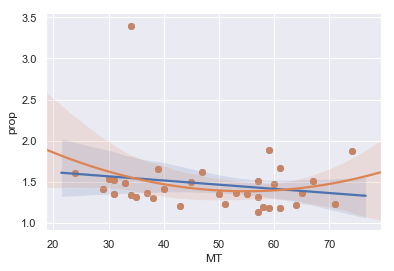

In [63]:
sns.regplot(df_qualtrics["MT"],  multitaskingevents["prop"]);
sns.regplot(df_qualtrics["MT"],  multitaskingevents["prop"], order=2)

### Multitasking als de proportie van singleapp sessions tov sessions met minsten 2 of 2

##### Je kan verschillende verhoudingen gaan berekenen per participant.

Obv appevents als df. 

In [277]:
#TODO: aantal singleapp sessions vs sessions met minstens 2
dfses = df_new.groupby(['ppn', 'session'])['application'].count().reset_index()

Om de proportie te berekenen moeten we dus weten hoeveel appevents per sessie dat er in totaal geregistreerd zijn om dan de proportie te berekenen; want proportie = singleappsessions / more app sessions (totaal - single)

In [278]:
Tot = dfses.groupby(['ppn']).size().to_frame()

In [280]:
Tot = Tot.reset_index()

In [281]:
Tot

,ppn,0
0,1,387
1,2,612
2,3,927
3,4,757
4,5,1603
5,6,1064
6,8,939
7,9,1030
8,10,1333
9,11,570


In [282]:
sessioncount = dfses.groupby(['ppn', 'application']).size().to_frame().reset_index()
sessioncount

,ppn,application,0
0,1,1,179
1,1,2,93
2,1,3,44
3,1,4,29
4,1,5,13
5,1,6,7
6,1,7,8
7,1,8,3
8,1,9,2
9,1,10,3


voor de singleapp-events wil je enkel maar die die voldoen aan de conditie application==1

In [286]:
singleapp = sessioncount[sessioncount['application'] == 1]
singleapp.head(5)

,ppn,application,0
0,1,1,179
13,2,1,255
34,3,1,393
60,4,1,325
88,5,1,935


In [288]:
singleapp.columns = ["ppn", "application", "single_app"]

In [289]:
singleapp.head(5)

,ppn,application,single_app
0,1,1,179
13,2,1,255
34,3,1,393
60,4,1,325
88,5,1,935


In [293]:
singleapp = singleapp[["ppn", "single_app"]]

In [307]:
grddrie = sessioncount[sessioncount['application'] > 3]

In [309]:
grddrie.columns = ["ppn", "aantal", "tel"]

In [312]:
grddrie = grddrie.groupby("ppn")["tel"].sum().to_frame()

In [314]:
grddrie = grddrie.reset_index()

In [291]:
Tot.columns = ["ppn", "Tot_app"]

In [292]:
Tot.head()

,ppn,Tot_app
0,1,387
1,2,612
2,3,927
3,4,757
4,5,1603


In [296]:
treintjes = pd.merge(singleapp, Tot, how='right', on='ppn')

In [298]:
treintjes.head(5)

,ppn,single_app,Tot_app
0,1,179,387
1,2,255,612
2,3,393,927
3,4,325,757
4,5,935,1603


In [299]:
treintjes["prop"] = treintjes["single_app"]/treintjes["Tot_app"]

In [300]:
treintjes

,ppn,single_app,Tot_app,prop
0,1,179,387,0.462532
1,2,255,612,0.416667
2,3,393,927,0.423948
3,4,325,757,0.429326
4,5,935,1603,0.583281
5,6,511,1064,0.480263
6,8,397,939,0.422790
7,9,656,1030,0.636893
8,10,563,1333,0.422356
9,11,310,570,0.543860


Hoe groter de proportie, hoe meer een participant tijdens zijn sessies maar 1 enkele app bekijkt en niet meerdere tijdens dezelfde sessie gaat gaan aanleggen. 

In [315]:
treintjes = pd.merge(treintjes, grddrie, how='right', on='ppn')

In [316]:
treintjes

,ppn,single_app,Tot_app,prop,tel
0,1,179,387,0.462532,71
1,2,255,612,0.416667,151
2,3,393,927,0.423948,183
3,4,325,757,0.429326,223
4,5,935,1603,0.583281,237
5,6,511,1064,0.480263,229
6,8,397,939,0.422790,223
7,9,656,1030,0.636893,82
8,10,563,1333,0.422356,302
9,11,310,570,0.543860,79


nog proportie van single/meer dan drie 

In [319]:
treintjes["prop_3"] = treintjes["single_app"]/treintjes["tel"]

In [369]:
treintjes

,ppn,single_app,Tot_app,prop,tel,prop_3
0,1,179,387,0.462532,71,2.521127
1,2,255,612,0.416667,151,1.688742
2,3,393,927,0.423948,183,2.147541
3,4,325,757,0.429326,223,1.457399
4,5,935,1603,0.583281,237,3.945148
5,6,511,1064,0.480263,229,2.231441
6,8,397,939,0.422790,223,1.780269
7,9,656,1030,0.636893,82,8.000000
8,10,563,1333,0.422356,302,1.864238
9,11,310,570,0.543860,79,3.924051


hoe kleiner de prop_3 waarde, hoe meer appevents per sessie er voorkwamen, dus hoe meer treintjesgedrag iemand vertoond. 

In [320]:
treintjes.to_excel("treintjes.xlsx")

Dit is in een interessante kolom: je krijgt een idee van hoeveel apps ze gemiddeld gaan gebruiken tijdens een sessie (treintjes gedrag)

## Multitasking als gemiddeld aantal aanleggen per dag gelgod. 

## Ratio van sessie gestart met notificatie

Dus dit kan je weten uit de MobileDNA data van de appevents aangezien "notifications (True/False)" aangeeft of de sessie gestart is vanuit een notificatie. 

In [321]:
ratio_not_long = df_new.groupby(['ppn','notification']).size().to_frame().reset_index()

In [322]:
ratio_not_long.head(5)

,ppn,notification,0
0,1,False,855
1,1,True,73
2,2,False,3991
3,2,True,211
4,3,False,2185


In [323]:
ratio_not_long.columns = ["ppn", "notification", "amount"]

##### from long to wide 

In [324]:
ratio_not_wide = ratio_not_long.pivot(index='ppn', columns='notification', values='amount')

In [325]:
ratio_not_wide.head(5)

notification,False,True
ppn,,
1,855,73
2,3991,211
3,2185,397
4,2244,418
5,3725,88


In [220]:
ratio_not_wide = ratio_not_wide.reset_index()
ratio_not_wide.head(5)

notification,index,ppn,False,True
0,0,1,855,73
1,1,2,3991,211
2,2,3,2185,397
3,3,4,2244,418
4,4,5,3725,88


In [328]:
ratio_not_wide.columns = ["zever", "ppn", "Started_without", "Started_with"]

ValueError: Length mismatch: Expected axis has 2 elements, new values have 4 elements

In [227]:
ratio_not_wide["tot"] = ratio_not_wide["False"] + ratio_not_wide["True"]

In [230]:
ratio_not_wide["ratio"] = ratio_not_wide["Started_with"]/ratio_not_wide["tot"]
ratio_not_wide

,zikt,ppn,Started_without,Started_with,tot,ratio
0,0,1,855,73,928,0.078664
1,1,2,3991,211,4202,0.050214
2,2,3,2185,397,2582,0.153757
3,3,4,2244,418,2662,0.157025
4,4,5,3725,88,3813,0.023079
5,5,6,2742,195,2937,0.066394
6,6,8,2788,150,2938,0.051055
7,7,9,1722,103,1825,0.056438
8,8,10,3562,223,3785,0.058917
9,9,11,1139,140,1279,0.109461


##### Grote kans dat deze ratio een invloed heeft op mensen hun aandachtsspan. 

In [232]:
ratio_not_wide.to_excel("ratio_not_wide.xlsx")

Deze ratio gaat meer over Visual Reaction span. Eerder dan rond multitasking

## RT op notificatie 

In [329]:
### ### ### ### ### ### ### ### ### 
### ###     Notificatie     ### ###
### ### ### ### ### ### ### ### ###

notif = pd.read_csv('D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/MobileDNAdata/floor_notifications.csv', sep = ';', parse_dates=['time'])

In [330]:
notif['application'] = notif['application'].astype("category")
notif['data_version'] = notif['data_version'].astype("category")
df_notif = df[df.notification == True]
notif = notif[notif.posted == True]
notif = notif.sort_values('time', ascending=False)
df_notif.reset_index()
df_notif = df_notif.sort_values('startTime', ascending=False)

In [331]:
def findNotif(row):
    app = row.application
    start = row.startTime
    res = notif[(notif['application'] == app) & (notif['time'] < start)]
    #.reset_index(drop=True)
    res.sort_values('time', ascending=False)
    try:
        max = res['time'].idxmax()
        return res['time'][max]
    except ValueError:
        pass

In [332]:
df_notif['timeNotif'] = df_notif.apply(findNotif, axis=1)

In [333]:
df_notif['reactiesnelheid'] = df_notif['startTime'] - df_notif['timeNotif']
df_notif['reactieSec'] = df_notif.reactiesnelheid / timedelta(seconds=1)
#df_notif[['id', 'application', 'startTime', 'timeNotif', 'reactiesnelheid', 'reactieSec']].to_csv('./data/proximus/test_reactiesnelheid.csv', sep=";")

In [334]:
df_notif['reactiesnelheid']

95471   00:00:00.049000
36282   00:00:02.603000
90246   00:05:35.394000
33824   00:00:01.569000
40056   00:00:01.525000
68531   00:00:03.137000
68530   00:00:02.077000
44689   00:00:00.043000
29341   00:00:31.854000
33821   00:00:06.137000
40055   00:00:00.216000
40054   00:00:07.721000
38521   00:00:05.778000
35483   00:00:20.832000
49641   00:01:23.395000
62615   00:00:04.340000
52678   00:02:50.150000
56493   00:02:49.723000
90533   00:08:29.412000
54137   00:00:56.204000
63638   00:43:34.238000
46168   00:00:52.382000
84209   00:00:12.503000
48274   00:00:00.657000
90531   00:00:00.251000
84384   00:02:57.731000
19448   00:00:05.948000
82493   00:00:44.206000
46167   00:00:00.001000
30666   01:17:04.377000
              ...      
87874   00:00:23.040000
70772   00:00:35.668000
11511   00:00:06.949000
6900    00:02:05.612000
25225   00:07:49.331000
5178    00:45:03.030000
23317   00:05:07.318000
87814   00:17:58.336000
11516   00:03:52.085000
12936   00:03:50.974000
22279   00:00:12

In [335]:
appReacties = df_notif.groupby(['ppn', 'application'])['reactieSec'].mean()
ppnReacties = df_notif.groupby('ppn')['reactieSec'].mean()

In [338]:
ppnReacties = ppnReacties.to_frame().reset_index()

In [339]:
ppnReacties.to_excel("ppnRT.xlsx")

Gemiddelde reactietijd op notificaties: kans dat wanneer iemand kortere RT heeft ook meer gezien kan worden als een multitasker. 

Interessante getallen om op te slaan. 

In [82]:
appReacties = appReacties.reset_index()
appReacties.sort_values('reactieSec', ascending=False)
appReactiesOut = appReacties[appReacties['reactieSec'] < 10000]
appReactiesOut = appReactiesOut.sort_values('reactieSec', ascending=False).reset_index(drop=True)

###### appReacties toont de apps waarop snel wordt gereageerd per participant. Daardoor kunnen we per participant de top 5 van apps waarop ze snel reageren eruit halen. 

In [92]:
top5Reacties = appReacties.groupby(['ppn','application'])['reactieSec'].nsmallest(5)

In [ ]:
Deze werkt nog niet. 

#### Multitasking maten vergelijken met elkaar: zowel MobileDNA indicaties, als multitasking preference scale (zelfrapportage), als computertaken 

In [351]:
multitasking_tog = pd.read_excel('D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/experiment verloop/multitasking.xlsx')

In [353]:
multitasking_tog.head()

,ppn,MobileDNA ID,Prop_RT_SC,prop_SC_prop,STR_CE_RT,STR_CE_ACC,interceptRT,slopeRT,MT,gem_appE/sessie,prop_treintjes,prop_treintjes_3,reactieSec_not
0,1,8a2f0420-8011-4adc-b128-95a40786d765,1.330550,0.975806,71.703924,0.000000,-35410.404725,54.162839,30,2.397933,0.462532,2.521127,899.164740
1,2,a0d70d38-201b-49ad-b700-22d84f037555,1.176528,0.924658,187.927337,0.060000,-12641.706395,26.545730,34,6.866013,0.416667,1.688742,418.887671
2,3,0870854d-f706-4144-bcb4-0ace2e447425,1.204121,0.947368,243.198818,0.003205,-13193.338189,26.906232,31,2.785329,0.423948,2.147541,328.611834
3,4,cca5f33f-7fb0-4b76-a0e6-ae03dbffb966,1.158447,0.976190,-5.250477,0.126603,-20813.206677,33.894402,59,3.516513,0.429326,1.457399,112.822895
4,5,c812a99a-59e4-4c5a-a721-0150d42102c6,1.305790,0.973404,113.674637,0.081633,-21785.357181,30.999738,33,2.378665,0.583281,3.945148,319.425170


Er zijn enkele ontbrekende waarden maar eerst proberen om correlatiematrix van de verschillende taken te krijgen zonder die ontbrekende waarden eruit te filteren. 

In [358]:
corrmat = multitasking_tog[["MT", "Prop_RT_SC", "prop_SC_prop", "STR_CE_RT", "STR_CE_ACC", "interceptRT", "slopeRT", "gem_appE/sessie", "prop_treintjes", "prop_treintjes_3", "reactieSec_not"]]

In [359]:
corr = corrmat.corr()

Deze "corr" naar excel zodat je deze kan invoegen in R studio en ook de significantie kan vinden van de waarden in de correlatiematrix. 

In [363]:
corrmat.to_excel("corrmatmult.xlsx")

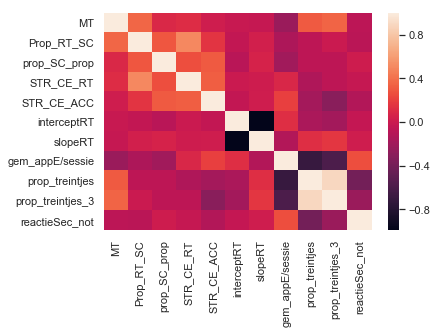

In [360]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [361]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,MT,Prop_RT_SC,prop_SC_prop,STR_CE_RT,STR_CE_ACC,interceptRT,slopeRT,gem_appE/sessie,prop_treintjes,prop_treintjes_3,reactieSec_not
MT,1,0.36,0.096,0.12,0.024,-0.012,-0.018,-0.22,0.31,0.35,-0.072
Prop_RT_SC,0.36,1,0.3,0.51,0.15,-0.04,0.043,-0.14,-0.061,0.00096,-0.08
prop_SC_prop,0.096,0.3,1,0.27,0.31,-0.084,0.06,-0.2,-0.065,-0.06,0.02
STR_CE_RT,0.12,0.51,0.27,1,0.33,0.0005,0.014,0.085,-0.13,-0.058,-0.025
STR_CE_ACC,0.024,0.15,0.31,0.33,1,-0.035,0.021,0.2,-0.18,-0.3,-0.11
interceptRT,-0.012,-0.04,-0.084,0.0005,-0.035,1,-0.99,0.12,-0.15,-0.18,-0.033
slopeRT,-0.018,0.043,0.06,0.014,0.021,-0.99,1,-0.11,0.13,0.17,0.028
gem_appE/sessie,-0.22,-0.14,-0.2,0.085,0.2,0.12,-0.11,1,-0.7,-0.59,0.26
prop_treintjes,0.31,-0.061,-0.065,-0.13,-0.18,-0.15,0.13,-0.7,1,0.9,-0.4
prop_treintjes_3,0.35,0.00096,-0.06,-0.058,-0.3,-0.18,0.17,-0.59,0.9,1,-0.23


### Significante correlaties in multitasking

obv de significante correlaties ook nog eens visueel checken hoe alles eruit ziet. 

##### (1) MT & Prop_RT_SC (task-switching taak):  r = 0.36, p = 0.0229

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


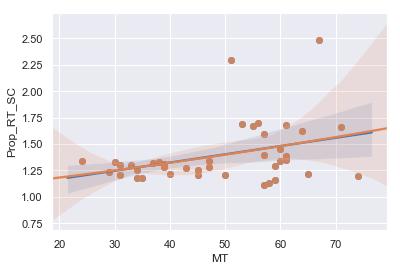

In [364]:
sns.regplot(corrmat["MT"],  corrmat["Prop_RT_SC"]);
sns.regplot(corrmat["MT"],  corrmat["Prop_RT_SC"], order=2)

###### Betekenis: wie dus een hogere multitasking preference heeft, zal ook een proportioneel grotere vertraging vertonen bij mixed tov non-mixed blok. 

##### (2) Prop_RT_SC & STR_CE_RT: r = 0.51, p = 0.0009

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


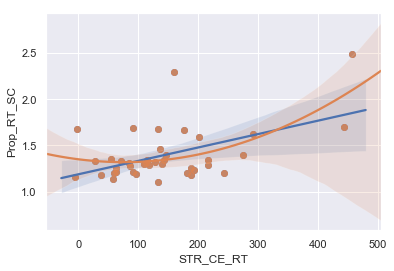

In [365]:
sns.regplot(corrmat["STR_CE_RT"],  corrmat["Prop_RT_SC"]);
sns.regplot(corrmat["STR_CE_RT"],  corrmat["Prop_RT_SC"], order=2)

###### Betekenis (?): wie proportioneel trager reageert op mixed dan op non-mixed blok, zal ook lijden aan een grotere congruentie-effect in de Stroop taak. 

##### (3) interceptRT & slopeRT: r= -0.99, p = 0.000

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


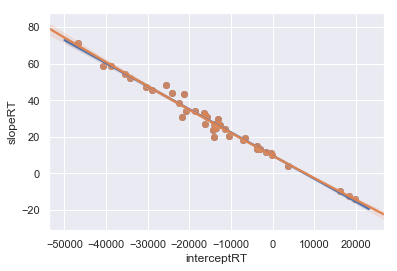

In [366]:
sns.regplot(corrmat["interceptRT"],  corrmat["slopeRT"]);
sns.regplot(corrmat["interceptRT"],  corrmat["slopeRT"], order=2)

###### Kan dit zo perfect zijn? 

##### (4) gem_appE/sessie & prop_treintjes: r = -0.7, p= 0.000

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


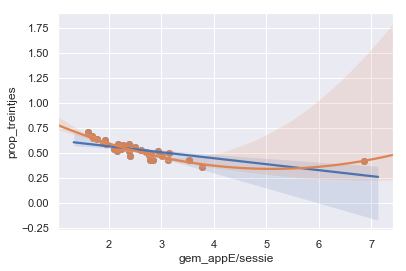

In [367]:
sns.regplot(corrmat["gem_appE/sessie"],  corrmat["prop_treintjes"]);
sns.regplot(corrmat["gem_appE/sessie"],  corrmat["prop_treintjes"], order=2)

##### (5) MT & prop_treintjes_3: r = 0.35, p = 0.0437

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


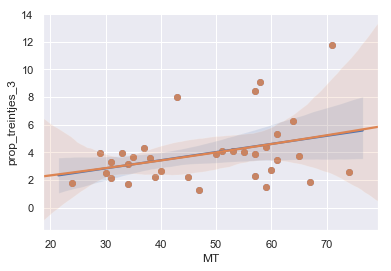

In [368]:
sns.regplot(corrmat["MT"],  corrmat["prop_treintjes_3"]);
sns.regplot(corrmat["MT"],  corrmat["prop_treintjes_3"], order=2)

###### Hoe meer iemand zal aangeven dat ze een multitasking voorkeur hebben, hoe meer single app events er proportioneel voorkwamen vergeleken met meer dan 3 app events in een sessie. 

##### (6) gem_appE/sessie & prop_treintjes_3: r=-0.59, p = 0.0002

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


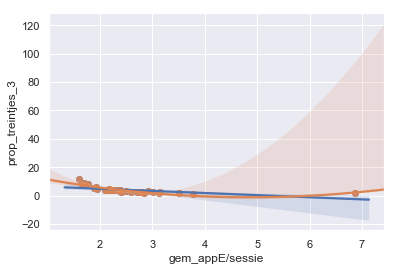

In [370]:
sns.regplot(corrmat["gem_appE/sessie"],  corrmat["prop_treintjes_3"]);
sns.regplot(corrmat["gem_appE/sessie"],  corrmat["prop_treintjes_3"], order=2)

###### Hoe meer app events iemand vertoonde per sessie, hoe kleiner de proportie treintjes_3 (want meer multiple app events; logisch)

##### (7) prop_treintjes & prop_treintjes_3: r = 0.9, p = 0.0000

###### Logisch dat er hier een correlatie wordt gevonden, aangezien hetzelfde wordt bekeken aan de hand van die proportie, maar dat men een verschil maakt in hoe wordt de proportie wordt berekend. 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


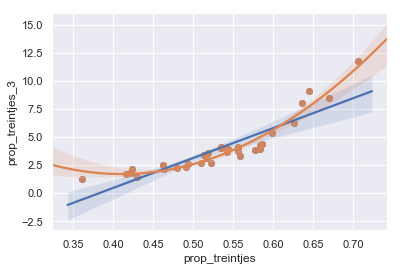

In [371]:
sns.regplot(corrmat["prop_treintjes"],  corrmat["prop_treintjes_3"]);
sns.regplot(corrmat["prop_treintjes"],  corrmat["prop_treintjes_3"], order=2)

##### (8) prop_treintjes & reactieSec_not: r = -0.4, p = 0.0182

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


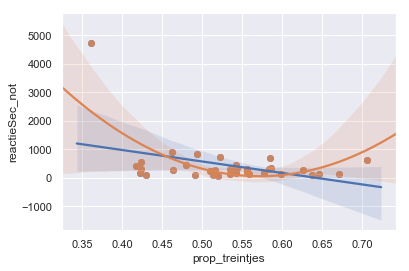

In [372]:
sns.regplot(corrmat["prop_treintjes"],  corrmat["reactieSec_not"]);
sns.regplot(corrmat["prop_treintjes"],  corrmat["reactieSec_not"], order=2)

###### Hoe groter de proportie treintjes, hoe sneller men reageert op een bepaalde notificatie. 

### Is er een verschil in waarden afhankelijk van tot welke groep in MT een participant behoort? 

In [373]:
multitasking_cat = pd.read_excel("D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/experiment verloop/multitasking.xlsx")

In [374]:
multitasking_cat.head()

,ppn,MobileDNA ID,Prop_RT_SC,prop_SC_prop,STR_CE_RT,STR_CE_ACC,interceptRT,slopeRT,MT,MT_cat,gem_appE/sessie,prop_treintjes,prop_treintjes_3,reactieSec_not
0,1,8a2f0420-8011-4adc-b128-95a40786d765,1.330550,0.975806,71.703924,0.000000,-35410.404725,54.162839,30,geen voorkeur om te multitasken,2.397933,0.462532,2.521127,899.164740
1,2,a0d70d38-201b-49ad-b700-22d84f037555,1.176528,0.924658,187.927337,0.060000,-12641.706395,26.545730,34,geen voorkeur om te multitasken,6.866013,0.416667,1.688742,418.887671
2,3,0870854d-f706-4144-bcb4-0ace2e447425,1.204121,0.947368,243.198818,0.003205,-13193.338189,26.906232,31,geen voorkeur om te multitasken,2.785329,0.423948,2.147541,328.611834
3,4,cca5f33f-7fb0-4b76-a0e6-ae03dbffb966,1.158447,0.976190,-5.250477,0.126603,-20813.206677,33.894402,59,voorkeur om te multitasken,3.516513,0.429326,1.457399,112.822895
4,5,c812a99a-59e4-4c5a-a721-0150d42102c6,1.305790,0.973404,113.674637,0.081633,-21785.357181,30.999738,33,geen voorkeur om te multitasken,2.378665,0.583281,3.945148,319.425170


##### (1) prop_RT_SC

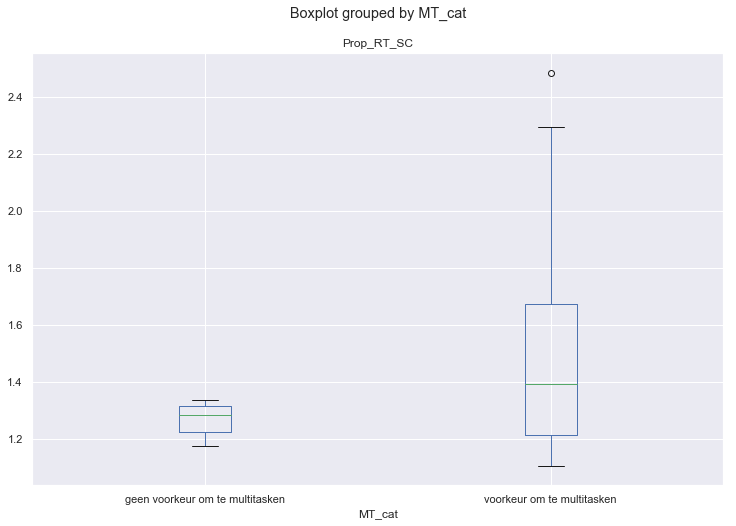

In [376]:
#Create a boxplot
multitasking_cat.boxplot('Prop_RT_SC', by='MT_cat', figsize=(12, 8))

In [377]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [379]:
 mod = ols('Prop_RT_SC ~ MT_cat',
                data=multitasking_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

            sum_sq    df         F    PR(>F)
MT_cat    0.556091   1.0  8.054167  0.007246
Residual  2.623669  38.0       NaN       NaN


Significant verschil tussen de proportie in switching en mixing cost. Wie een voorkeur heeft om te multitasken zal ook gemiddeld meer vertraging vertonen in mixed block tov non-mixed blok. 

##### (2) prop_SC_prop

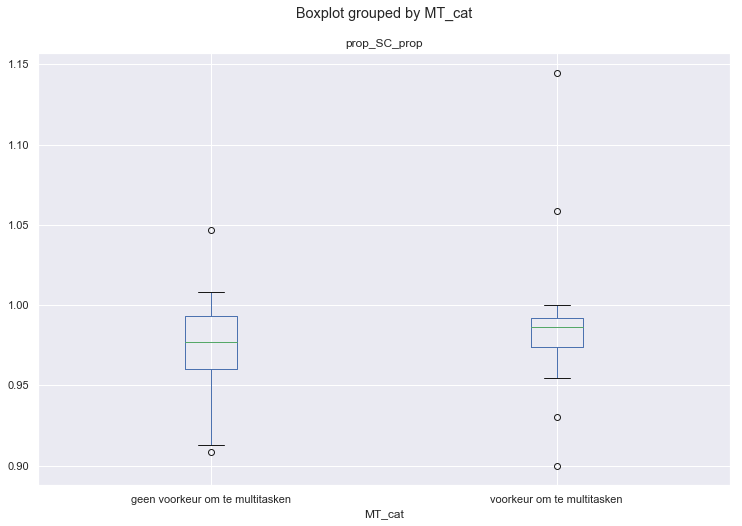

In [380]:
#Create a boxplot
multitasking_cat.boxplot('prop_SC_prop', by='MT_cat', figsize=(12, 8))

In [381]:
 mod = ols('prop_SC_prop ~ MT_cat',
                data=multitasking_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

            sum_sq    df        F    PR(>F)
MT_cat    0.001811   1.0  1.06482  0.308642
Residual  0.064621  38.0      NaN       NaN


geen significant verschil. 

##### (3) STR_CE_RT

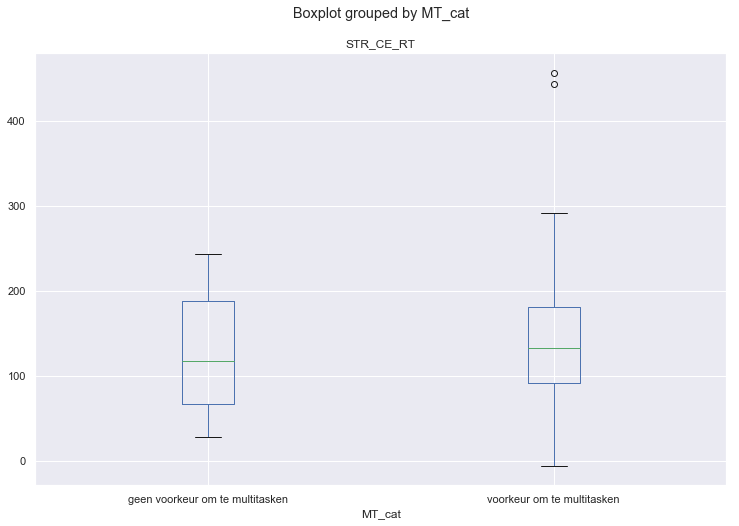

In [382]:
#Create a boxplot
multitasking_cat.boxplot('STR_CE_RT', by='MT_cat', figsize=(12, 8))

In [383]:
 mod = ols('STR_CE_RT ~ MT_cat',
                data=multitasking_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                 sum_sq    df         F    PR(>F)
MT_cat     11319.018508   1.0  1.144486  0.291455
Residual  375821.812166  38.0       NaN       NaN


Geen significant verschil tussen beide groepen. 

##### (4) STR_CE_ACC

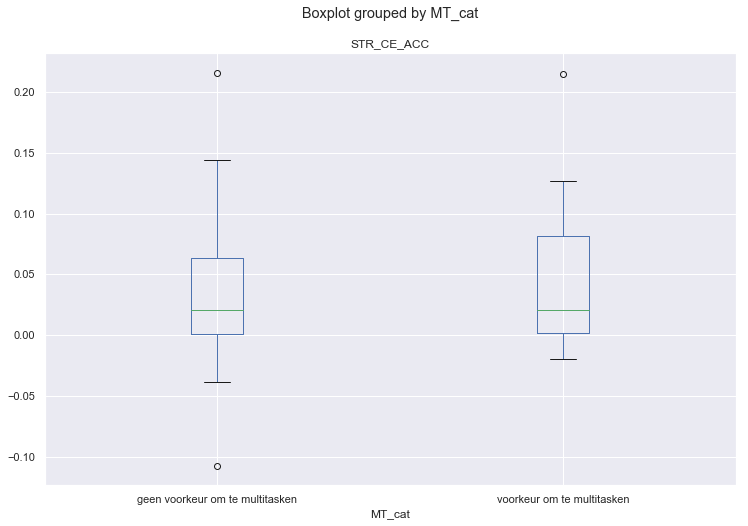

In [385]:
#Create a boxplot
multitasking_cat.boxplot('STR_CE_ACC', by='MT_cat', figsize=(12, 8))

##### (5) interceptRT

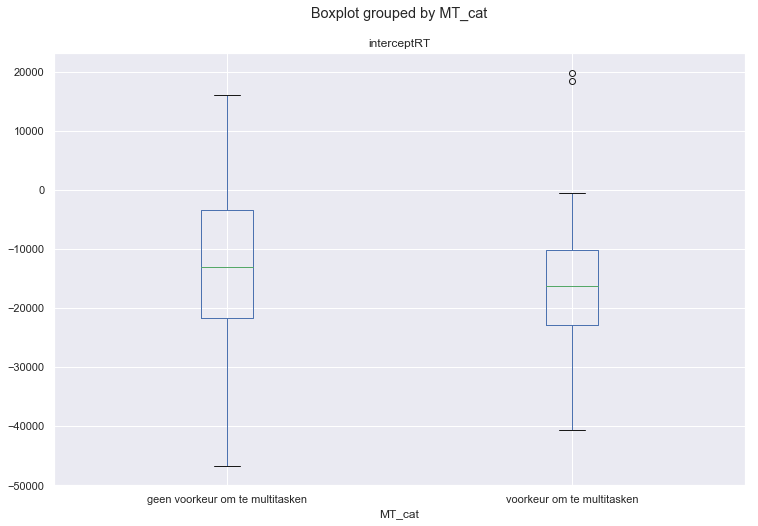

In [386]:
#Create a boxplot
multitasking_cat.boxplot('interceptRT', by='MT_cat', figsize=(12, 8))

In [387]:
 mod = ols('interceptRT ~ MT_cat',
                data=multitasking_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                sum_sq    df         F    PR(>F)
MT_cat    1.674143e+07   1.0  0.071662  0.790419
Residual  8.643838e+09  37.0       NaN       NaN


##### (6) slopeRT

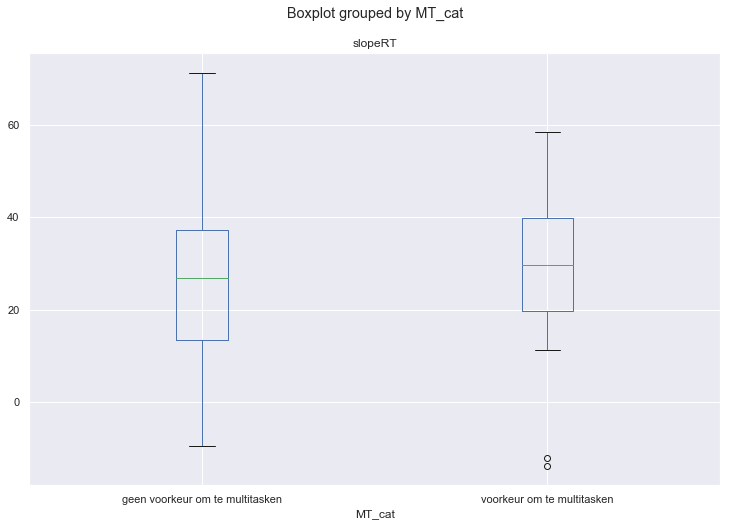

In [388]:
#Create a boxplot
multitasking_cat.boxplot('slopeRT', by='MT_cat', figsize=(12, 8))

##### (7) gem_appE/sessie

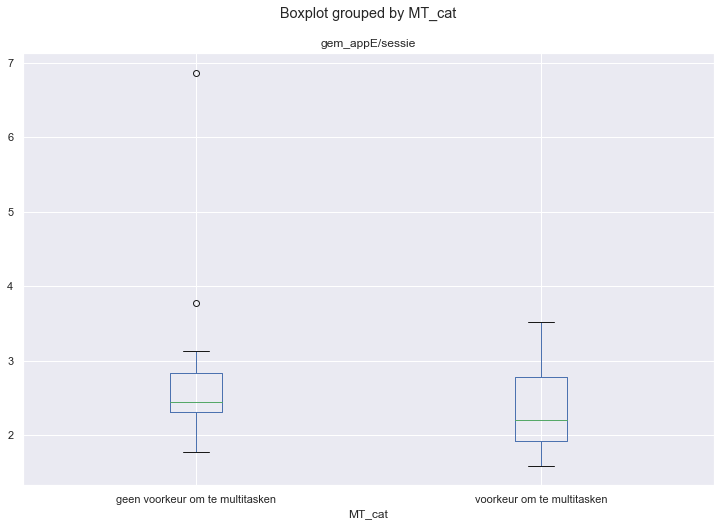

In [389]:
#Create a boxplot
multitasking_cat.boxplot('gem_appE/sessie', by='MT_cat', figsize=(12, 8))

##### (8) prop_treintjes

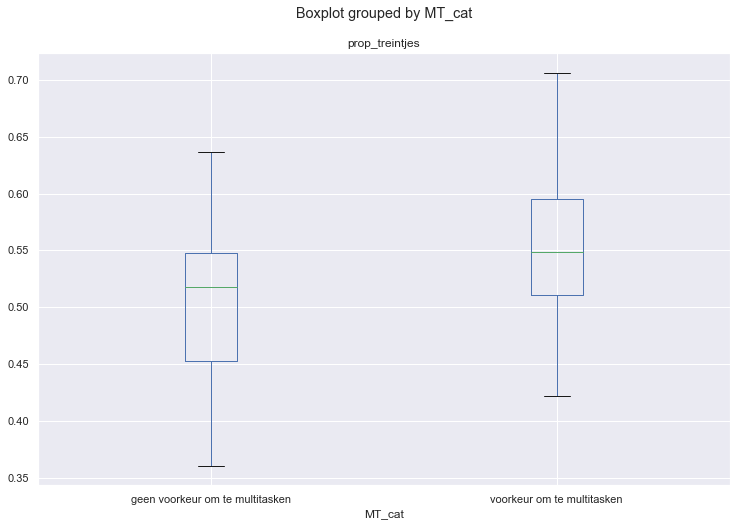

In [390]:
#Create a boxplot
multitasking_cat.boxplot('prop_treintjes', by='MT_cat', figsize=(12, 8))

In [391]:
 mod = ols('prop_treintjes ~ MT_cat',
                data=multitasking_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

            sum_sq    df         F    PR(>F)
MT_cat    0.023763   1.0  4.206667  0.048528
Residual  0.180761  32.0       NaN       NaN


hier krijgen we dus een significant verschil in prop treintjes; waarbij die proportie hoger zal zijn indien iemand een hogere voorkeur heeft om te multitasken. 

##### (9) prop_treintjes_3

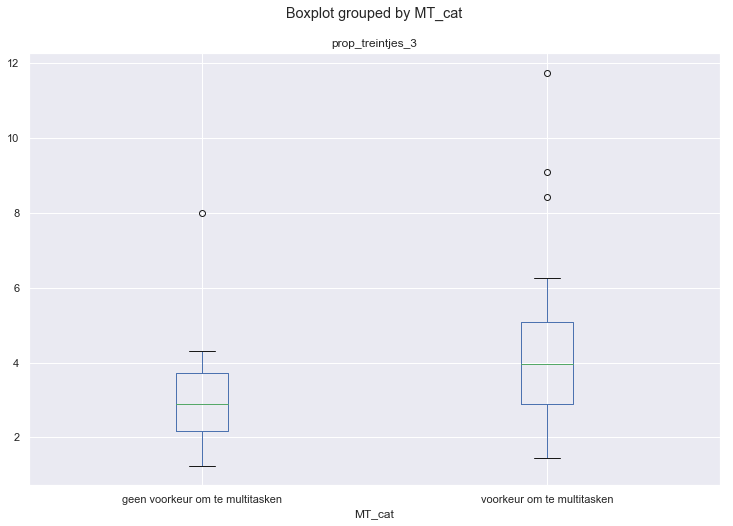

In [392]:
#Create a boxplot
multitasking_cat.boxplot('prop_treintjes_3', by='MT_cat', figsize=(12, 8))

In [393]:
 mod = ols('prop_treintjes_3 ~ MT_cat',
                data=multitasking_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

              sum_sq    df         F    PR(>F)
MT_cat     18.634281   1.0  3.696504  0.063466
Residual  161.313778  32.0       NaN       NaN


##### (10) reactieSec_not

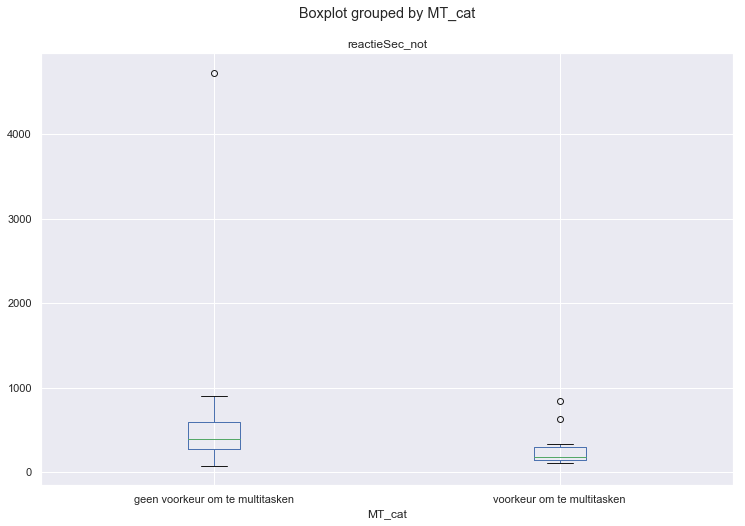

In [394]:
#Create a boxplot
multitasking_cat.boxplot('reactieSec_not', by='MT_cat', figsize=(12, 8))

In [395]:
 mod = ols('reactieSec_not ~ MT_cat',
                data=multitasking_cat).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                sum_sq    df         F    PR(>F)
MT_cat    1.488552e+06   1.0  2.516361  0.122504
Residual  1.892958e+07  32.0       NaN       NaN
